# Modelando la Pandemia

  En este proyecto vamos a estudiar y analizar los datos mundiales de la pandemia COVID-19 usando países modelo de distintas políticas públicas para luego interpretar otras curvas.

Puedes descargar el dataset de casos totales, divididos por país [aquí.](
https://ourworldindata.org/coronavirus-data?country=
) Descarga los datos  formato .csv luego podrás cargarlos en el notebook usando pandas, a partir de eso selecciona los de los países que te interesan, hay un ejemplo de cómo se hace esto en este notebook. 

# ¿Cómo empezó la pandemia?


  La primer parte del trabajo consiste en estudiar cómo se empieza a propagar la pandemia, luego analizaremos las medidas tomadas y su efectividad.

  Al inicio de una pandemia, se estima que los contagios siguen una ley exponencial, esa es la fase de "crecimiento exponencial", luego hay un decaimiento dado por la inmunidad. 

  Los datos de casos confirmados en función del tiempo $C(t)$, pueden aproximarse con el modelo

$C(t)=e^{k(t-t_0)}$

donde $t_0$ es la fecha del primer contagio, y $k$ es un parámetro propio de cada enfermedad, que habla de la contagiosidad. Cuanto mayor es $k$, más grande será el número de casos confirmados dado por la expresión. $k$ depende de el tiempo que una persona enferma contagia, el nivel de infecciosidad del virus y cuántas personas que se pueden contagiar ve una persona enferma por día. Es decir, la circulación. Haciendo cuarententa, $k$ disminuye, con la circulación $k$ aumenta.

  El parámetro $k$ está directamente relacionado con el $R$ del que tanto se habla en los medios. En este proyecto haremos foco en $k$, pero puedes profundizar sobre esto si quieres, empezandó por [aquí](https://es.wikipedia.org/wiki/Ritmo_reproductivo_b%C3%A1sico). 

  Es posible hacer un modelo completo, pero para eso es necesario utilizar ecuaciones diferenciales. Si quieres profundizar sobre eso, busca información sobre "modelo epidemiológico SEIR". Si quieres ver cómo funciona este modelo, puedes empezar por [aquí](http://gabgoh.github.io/COVID/index.html). En ese link está implementado el modelo SEIR (no es necesario entender las ecuaciones en este caso) y el rol que cumplen los parámetros, puedes explorar el impacto de variar $R$ y el resto de los valores para ver cómo impactan en la cirva de contagios. Ahora utilizaremos la siguiente expresión para describir únicamente la etapa de crecimiento exponencial.


  Comienza estudiando cómo se distribuyó el $k$ inicial de la pandemia y si es posible elaborar un intervalo de confianza razonable para este valor. Para eso 
  
  1. Elegir diez países del norte (ahí empezó la pandemia) y mide el valor de $k$ inicial de la pandemia, analizando datos del primer tramo.

  2. Analiza si es posible estimar la evolución mundial de la pandemia a partir 
de lo que obtuviste. Para esto, puedes elaborar un intervalo de confianza para $k$ a partir de los que obtuviste y así generar un modelo nuevo, basado en la distribución de $k$. Luego compara el modelo con los datos mundiales.

3. Piensa qué significa que el modelo de "bien" o dé "mal" ¿qué indicadores de esto existen?. Luego discute en el informe por qué crees que dio así. Recuerda que es importante elegir bien la población de muestra. Piensa qué criterios puedes elegir para representar bien la población mundial que se contagió al inicio de la pandemia.
 
 # Evaluando estrategias

 Ahora que tienes una manera de obtener información de las curvas, puedes intentar evaluar las estrategias de acción y el comportamiento de las poblaciones, construyendo un clasificador binario. 
1. Elige una categoría binaria que hable de políticas públicas elegidas por los países para enfrentar la pandemia que te interese estudiar, como pueden ser "la población hizo cuarententa" o "la población se vacunó".
2. Piensa qué indicadores de la curva pueden hablar del éxito de la política que quieres estudiar. Por ejemplo, si se tratase de evaluar el éxito de una cuarentena podría ser porcentaje de población  que se contagió o variación del valor de $k$ a partir de que se empezó a implementar esa medida. Elige al menos 3 indicadores.
3. Investiga sobre países que hayan aplicado o no esa política pública, para generar una base de datos. Por ejemplo, Brasil no hizo cuarentena y China hizo una muy estricta. Recuerda hacer una selección inteligente de la porción de datos de la curva de cada país que vas a analizar.
4. Construye un clasificador binario a partir de una regresión logística o usando Naive Bayes para intentar analizar la estrategia de otros países y ver si es posible predecirla a partir de la curva de contagios y el clasificador. Un posible clasificador binario es uno que clasifique el porcentaje de contagios en función da las categorías "la población hizo cuarentena" y "la población n hizo cuarentena". Haz esto para los 3 indicadores que elegiste en el punto 3 y compara los resultados.
5. Elabora un informe con lo que hayas aprendido a lo largo de este proyecto, donde discutas la utilidad o no de los indicadores que elegiste y del análisis estadístico propuesto.

#¡Comencemos!

  A continuación dejamos un ejemplo de cómo extraer el $k$ inicial de Argentina, usando un ajuste de cuadrados mínimos. Si necesitas los datos mundiales, en la columna de países aparecen como "World".



In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import pylab as plt
from google.colab import drive
from scipy.optimize import curve_fit
import seaborn as sns

In [3]:
#cargamos los datos

#drive.mount('/content/gdrive', force_remount=True)

# Aca deben apuntar a la carpeta de su drive donde guardaron los datos
#root_dir = "/content/gdrive/My Drive/datos_acamica"


In [4]:
datos=pd.read_csv('/content/drive/MyDrive/Acamica/owid-covid-data.csv')
datos.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [5]:
print(datos.shape)

(132644, 65)


In [6]:
datos.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

Sólo tomaremos, a los fines necesarios, 7 columnas : 

In [7]:
datos_covid = (datos.loc[:,['location','iso_code','date','total_tests','total_deaths','total_cases','new_cases']])

Y les cambiamos el nombre 

In [8]:
datos_covid.columns = ['Entity', 'Code', 'Day', 'Total_test', 'Total_confirmed_death_due_to_Covid19', 'Total_confirmed_cases_of_Covid19', 'New_cases_of_Covid19']
datos_covid.head()

,Entity,Code,Day,Total_test,Total_confirmed_death_due_to_Covid19,Total_confirmed_cases_of_Covid19,New_cases_of_Covid19
0,Afghanistan,AFG,2020-02-24,NaN,NaN,5.0,5.0
1,Afghanistan,AFG,2020-02-25,NaN,NaN,5.0,0.0
2,Afghanistan,AFG,2020-02-26,NaN,NaN,5.0,0.0
3,Afghanistan,AFG,2020-02-27,NaN,NaN,5.0,0.0
4,Afghanistan,AFG,2020-02-28,NaN,NaN,5.0,0.0


In [9]:
datos_covid.isnull().sum()

Entity                                      0
Code                                        0
Day                                         0
Total_test                              77299
Total_confirmed_death_due_to_Covid19    18351
Total_confirmed_cases_of_Covid19         7234
New_cases_of_Covid19                     7236
dtype: int64

In [10]:
datos_covid.columns

Index(['Entity', 'Code', 'Day', 'Total_test',
       'Total_confirmed_death_due_to_Covid19',
       'Total_confirmed_cases_of_Covid19', 'New_cases_of_Covid19'],
      dtype='object')

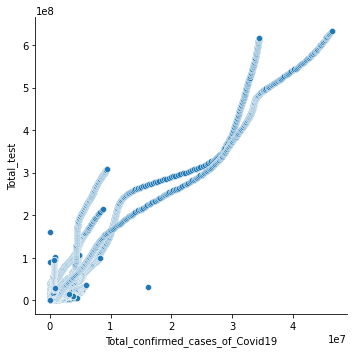

In [11]:
sns.relplot(x = 'Total_confirmed_cases_of_Covid19', y= 'Total_test', data = datos_covid)

In [12]:
#Creo un DF con cada pais elegido cuyas instancias correspondientes a la variable 'Total_confirmed_cases_of_Covid19' sean valores mayores a 0

#maskCovidArgentina=datos_covid[((datos_covid.Entity == "Argentina")) & ((datos_covid.Total_confirmed_cases_of_Covid19 >= 1))] 
#Argentina=pd.DataFrame(maskCovidArgentina)
#Argentina.head()


In [13]:
#DF todos los datos de Argentina
#maskCovidArgentina2=datos_covid[((datos_covid.Entity == "Argentina"))] 
#Argentina2=pd.DataFrame(maskCovidArgentina2)
#Argentina2.head()

In [14]:
#Argentina2.iloc[500:550]
#Argentina2.tail()

Elimino los NaN de la columna Total_confirmed_cases_of_Covid19 (acumulado de casos) para agilizar el código. De esta manera empieza a contabilizar desde el primer caso detectado.


In [15]:
datos_covid = datos_covid.dropna(subset=["Total_confirmed_cases_of_Covid19"]) #quito los NaN de la columna Total_confirmed_cases_of_Covid19
print("DataFrame after removing rows with NaN value in 'Total_confirmed_cases_of_Covid19' Column:")
print()
datos_covid.head()


DataFrame after removing rows with NaN value in 'Total_confirmed_cases_of_Covid19' Column:



,Entity,Code,Day,Total_test,Total_confirmed_death_due_to_Covid19,Total_confirmed_cases_of_Covid19,New_cases_of_Covid19
0,Afghanistan,AFG,2020-02-24,NaN,NaN,5.0,5.0
1,Afghanistan,AFG,2020-02-25,NaN,NaN,5.0,0.0
2,Afghanistan,AFG,2020-02-26,NaN,NaN,5.0,0.0
3,Afghanistan,AFG,2020-02-27,NaN,NaN,5.0,0.0
4,Afghanistan,AFG,2020-02-28,NaN,NaN,5.0,0.0


In [16]:
datos_covid.isnull().sum()

Entity                                      0
Code                                        0
Day                                         0
Total_test                              70353
Total_confirmed_death_due_to_Covid19    11118
Total_confirmed_cases_of_Covid19            0
New_cases_of_Covid19                        9
dtype: int64

Y reindexamos

In [17]:
datos_covid.reset_index(inplace=True, drop=False) #pongo el indice en órden tal que pueda usar todos los datos en una funcion sin repetir!
datos_covid.head()

,index,Entity,Code,Day,Total_test,Total_confirmed_death_due_to_Covid19,Total_confirmed_cases_of_Covid19,New_cases_of_Covid19
0,0,Afghanistan,AFG,2020-02-24,NaN,NaN,5.0,5.0
1,1,Afghanistan,AFG,2020-02-25,NaN,NaN,5.0,0.0
2,2,Afghanistan,AFG,2020-02-26,NaN,NaN,5.0,0.0
3,3,Afghanistan,AFG,2020-02-27,NaN,NaN,5.0,0.0
4,4,Afghanistan,AFG,2020-02-28,NaN,NaN,5.0,0.0


In [18]:
paises=datos_covid['Entity'] #cargo el vector de paises
confirmados=datos_covid['Total_confirmed_cases_of_Covid19'] #carga vector todos los casos confirmados
casosnuevos = datos_covid['New_cases_of_Covid19'] #vector de casos nuevos

**China**

Text(0, 0.5, 'cantidad de casos')

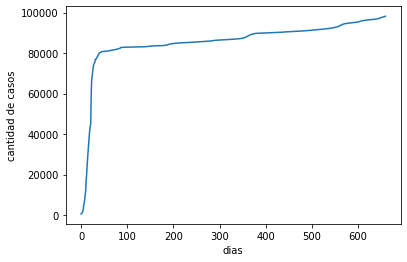

In [19]:
#Sabemos el la pandemia comenzó en Wuhan, China
#Curva de casos (acumulado)
ind_China=np.where(paises=='China')
ind_China=ind_China[0]
casos_China=confirmados[ind_China]
dias=np.arange(0,len(casos_China))
plt.plot(dias,casos_China)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Text(0, 0.5, 'cantidad de casos nuevos por día')

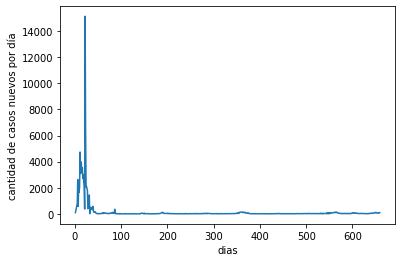

In [20]:
#Curva de casos nuevos diarios
casos_nuevos_China = casosnuevos[ind_China]
dias=np.arange(0,len(casos_China))
plt.plot(dias,casos_nuevos_China)
plt.xlabel('dias')
plt.ylabel('cantidad de casos nuevos por día')

Al inicio de una pandemia, se estima que los contagios siguen una ley exponencial, esa es la fase de "crecimiento exponencial", luego hay un decaimiento dado por la inmunidad.

Los datos de casos confirmados en función del tiempo C(t), pueden aproximarse con el modelo

$C(t)=e^{k(t−t0)}$ 

donde t0 es la fecha del primer contagio, y k es un parámetro propio de cada enfermedad, que habla de la contagiosidad.

In [21]:
#es necesario conocer la curva exponencial de crecimiento de los primeros días de la pandemia
#se genera la funcion. 

def exponencial(t,k,t0):
  C=np.exp(k*(t-t0))
  return C

In [22]:
#tomamos los primeros 60 días, desde el primer caso detectado
casos_principio_China=casos_China[0:60]
dias_principio_China=dias[0:60]

In [23]:
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principio_China, casos_principio_China) 
popt, pcov
# curve_fit devuelve dos resultados: El primero (popt) son los parámetros óptimos hallados. 
#El segundo (pcov) es la matriz de covarianza de los parámetros hallados

(array([ 2.27402426e-02, -4.48814247e+02]),
 array([[6.49293219e-06, 1.40075183e-01],
        [1.40075183e-01, 3.02460144e+03]]))

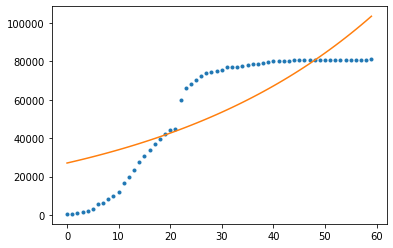

In [24]:
k_China=popt[0]
t0_China=popt[1]
casos_simu_China=exponencial(dias_principio_China,k_China,t0_China)
plt.plot(dias_principio_China,casos_principio_China,'.')
plt.plot(dias_principio_China,casos_simu_China)

In [25]:
k_China

0.0227402425966255

**Argentina**

Text(0, 0.5, 'cantidad de casos')

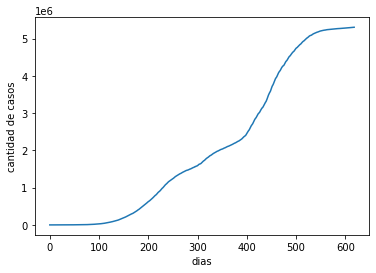

In [26]:
#Tomamos los datos de Argentina
ind_arg=np.where(paises=='Argentina')
ind_arg=ind_arg[0]
casos_arg=confirmados[ind_arg]
dias=np.arange(0,len(casos_arg))
plt.plot(dias,casos_arg)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Esta es la curva de **casos totales** de la Argentina. Aquí no se ven las olas, ya que estas se ven en la curva de casos confirmados por día, es decir, de casos nuevos. Esta habla de los acumulados, entonces siempre se agregan.

Text(0, 0.5, 'cantidad de casos')

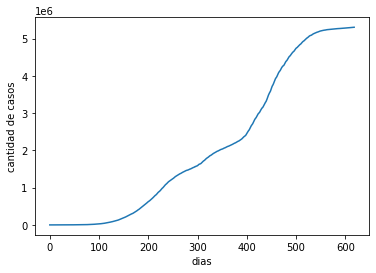

In [27]:
#casos_nuevos_Arg = casosnuevos[ind_arg]
dias=np.arange(0,len(casos_arg))
plt.plot(dias,casos_arg)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Text(0, 0.5, 'cantidad de casos nuevos por día')

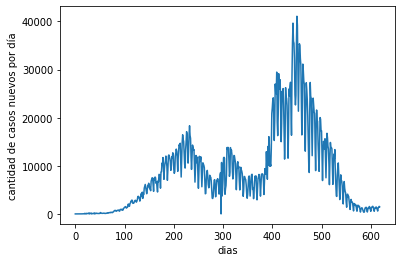

In [28]:
#Nuevos casos en Argentina
casos_nuevos_Arg = casosnuevos[ind_arg]
plt.plot(dias,casos_nuevos_Arg)
plt.xlabel('dias')
plt.ylabel('cantidad de casos nuevos por día')

Para ver mejor la curva, podemos tomar el logartimo de los datos. Una curva exponencial se ve lineal en escala logarítmica


In [29]:
dias.size, casos_arg.size

(619, 619)

Text(0, 0.5, 'log cantidad de casos')

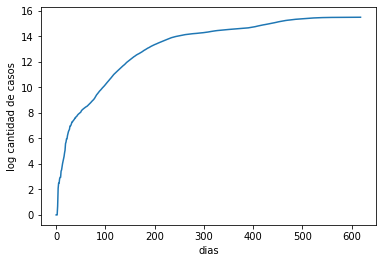

In [30]:
plt.plot(dias,np.log(casos_arg))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

Veamos lo que pasa en los primeros 60 días desde que se detectó el primer caso en Argentina, para ver cómo fue el $k$ inicial

In [31]:
 #groupby = datos_covid.groupby([datos_covid[datos_covid.Entity== "Argentina"].Entity, "Day"])["Total_confirmed_cases_of_Covid19"].count()
 #groupby.head()

In [32]:
#Argentina = datos_covid[datos_covid.Entity.isin(["Argentina"])]
#Argentina.head() #datos de Arg
#Argentina_2 = Argentina[Argentina.Total_confirmed_cases_of_Covid19.isin([1])]
#Argentina_2.head() #para saber cuándo es el primer caso de covid en el pais

Text(0, 0.5, 'cantidad de casos')

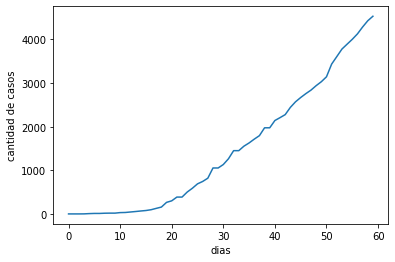

In [33]:
#tomamos el primera tramo - 60 días - desde el primer detectado
casos_principio=casos_arg[0:60]#[62:122] #desde el 0 a 60 no hubo casos registrados en argentina, se toma como iicio el primer día que se registró un caso (día 62)
#como se eliminaron los NaN de la columna, y se reindexó, no hace falta.
dias_principio=dias[0:60]#[62:122]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Es difícil determinar si esta parte es exponencial. Analicemos qué pasa en escala logarítmica.

Text(0, 0.5, 'log cantidad de casos')

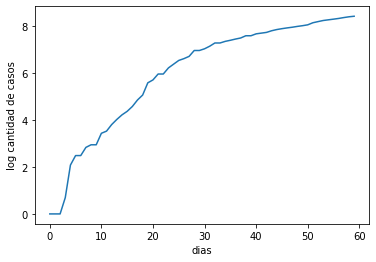

In [34]:

plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

#en el gráfico se ve que la curva exponencial inicia en el día 62

Mejor nos quedamos con lo que sucede entre los días 31 y 55 a partir de la aparición del primer caso, ya que ese fue el comportamiento más sostenido.

Text(0, 0.5, 'cantidad de casos')

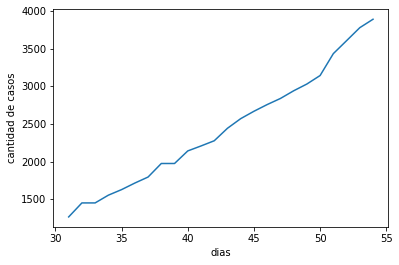

In [35]:
casos_principio_arg=casos_arg[31:55] #idem anterior, el día 31 desde el primer registro es el día 93 del total del iniciodel registro general.NO
dias_principio_arg=dias[31:55]

plt.plot(dias_principio_arg,casos_principio_arg)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

¡Se ve bastante lineal! Aprovechemos esto para averiguar el $k$ utilizando un ajuste hecho con el método de cuadrados mínimos, ajustando los datos al modelo 

$Confirmados=e^{k(t-t_0)}$



In [36]:
#definimos función para ajustar modelo
def exponencial(t,k,t0):
  C=np.exp(k*(t-t0))
  return C

In [37]:
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principio_arg, casos_principio_arg) 
popt, pcov
# curve_fit devuelve dos resultados: El primero (popt) son los parámetros óptimos hallados. 
#El segundo (pcov) es la matriz de covarianza de los parámetros hallados.


(array([ 4.53529440e-02, -1.28406655e+02]),
 array([[5.72305618e-07, 2.20760596e-03],
        [2.20760596e-03, 8.52627441e+00]]))

Veamos cómo se ajusta lo que obtuvimos a los datos reales

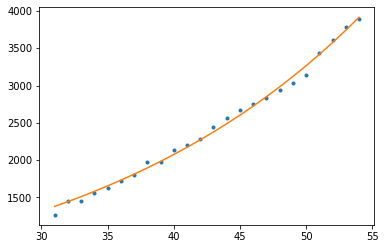

In [38]:
k_arg=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_principio_arg,k_arg,t0)
plt.plot(dias_principio_arg,casos_principio_arg,'.')
plt.plot(dias_principio_arg,casos_simu)

In [39]:
k_arg

0.04535294398082471

Como última pista, hagamos una función que determine los casos nuevos por día a partir de estas curvas. Puede ser útil para tu análisis.

In [40]:
def casos_nuevos(casos):
  nuevos=np.zeros(len(casos))
  i=0
  while i<len(nuevos)-1:
    nuevos[i]=casos[i+1]-casos[i]
    i=i+1

  return nuevos   

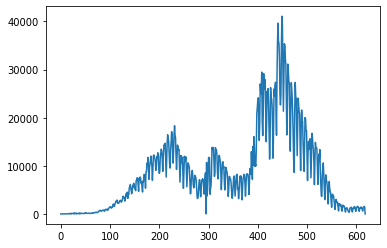

In [41]:
casos_arg=np.array(casos_arg)
nuevos_arg=casos_nuevos(casos_arg)
plt.plot(nuevos_arg)

1. Elegimos diez paises del norte: China, Canada, Italia, España, Francia, Alemania, EEUU, Inglaterra, Suecia, Rusia, Australia, Netherlands.

  Obtenemos el K de cada uno

**Canadá**

In [42]:
'''
canada = datos_covid[datos_covid.Entity.isin(["Canada"])]
canada.head() #datos de Canadá
Canada2 = canada[canada.Total_confirmed_cases_of_Covid19.isin([1])]
Canada2.head() #para saber cuándo es el primer caso de covid en Canada
'''

'\ncanada = datos_covid[datos_covid.Entity.isin(["Canada"])]\ncanada.head() #datos de Canadá\nCanada2 = canada[canada.Total_confirmed_cases_of_Covid19.isin([1])]\nCanada2.head() #para saber cuándo es el primer caso de covid en Canada\n'

In [43]:
#Curva de casos totales
ind_Canada=np.where(paises=='Canada')
ind_Canada=ind_Canada[0]
casos_Canada=confirmados[ind_Canada]
casos_nuevos_Canada = casosnuevos[ind_Canada]
dias=np.arange(0,len(casos_Canada))
#plt.plot(dias,casos_Canada)
#plt.xlabel('dias')
#plt.ylabel('cantidad de casos')

In [44]:
#curva de casos nuevos
casos_Canada=np.array(casos_Canada)
nuevos_Canada=casos_nuevos(casos_Canada) #funcion
#plt.plot(nuevos_Canada)
#plt.xlabel('dias')
#plt.ylabel('cantidad de casos nuevos por día')

In [45]:
#curva de casos nuevos
casos_nuevos_Canada = casosnuevos[ind_Canada]
#plt.plot(dias,casos_nuevos_Canada)
#plt.xlabel('dias')
#plt.ylabel('cantidad de casos nuevos por día')

In [46]:
#Escala logaritmica
#plt.plot(dias,np.log(casos_Canada))
#plt.xlabel('dias')
#plt.ylabel('log cantidad de casos')

In [47]:
casos_principio_Canada=casos_Canada[00:60]
dias_principio_Canada=dias[00:60]

In [48]:
#plt.plot(dias_principio_Canada,casos_principio_Canada)
#plt.xlabel('dias')
#plt.ylabel('cantidad de casos')

In [49]:
#ajustamos
popt_Canada, pcov_Canada = curve_fit(exponencial, dias_principio_Canada, casos_principio_Canada) 
print(popt_Canada)
print(pcov_Canada)

[ 0.23030716 23.12037254]
[[1.19887455e-05 1.77874407e-03]
 [1.77874407e-03 2.64955066e-01]]


In [50]:
k_Canada=popt_Canada[0]
t0_Canada=popt_Canada[1]
casos_simu_Canada=exponencial(dias_principio_Canada,k_Canada,t0_Canada)
#plt.plot(dias_principio_Canada,casos_principio_Canada,'.')
#plt.plot(dias_principio_Canada,casos_simu_Canada)

In [51]:
k_Canada

0.23030715645517355

**Italia**


In [52]:
#Italia = datos_covid[datos_covid.Entity.isin(["Italy"])]
#Italia.head() #datos de Canadá
#Italia2 = Italia[Italia.Total_confirmed_cases_of_Covid19.isin([1])]
#Italia2.head() #para saber cuándo es el primer caso de covid en ese pais

In [53]:
ind_Italia=np.where(paises=='Italy')
ind_Italia=ind_Italia[0]
casos_Italia=confirmados[ind_Italia]
#casos_nuevos_Italia = casos_nuevos[ind_Italia]
dias=np.arange(0,len(casos_Italia))
#plt.plot(dias,casos_Italia)
#plt.xlabel('dias')
#plt.ylabel('cantidad de casos')

In [54]:
#curva de casos nuevos
casos_Italia=np.array(casos_Italia)
nuevos_Italia=casos_nuevos(casos_Italia) #funcion
#plt.plot(nuevos_Italia)
#plt.xlabel('dias')
#plt.ylabel('cantidad de casos nuevos por día')

In [55]:
casos_principio_Italia=casos_Italia[0:60]
dias_principio_Italia=dias[0:60]

In [56]:
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principio_Italia, casos_principio_Italia) 
popt, pcov

(array([  0.10163528, -55.61073692]), array([[9.40795754e-06, 1.01979562e-02],
        [1.01979562e-02, 1.10762401e+01]]))

In [57]:
k_Italia=popt[0]
t0_Italia=popt[1]
casos_simu_Italia=exponencial(dias_principio_Italia,k_Italia,t0_Italia)
#plt.plot(dias_principio_Italia,casos_principio_Italia,'.')
#plt.plot(dias_principio_Italia,casos_simu_Italia)

In [58]:
k_Italia

0.10163528334715499

**España**

In [59]:

'''
España = datos_covid[datos_covid.Entity.isin(["Spain"])]
España.head() #datos de España

#España2 = España[España.Total_confirmed_cases_of_Covid19.isin([1])]
#España2.head() #para saber cuándo es el primer caso de covid en ese pais
'''

'\nEspaña = datos_covid[datos_covid.Entity.isin(["Spain"])]\nEspaña.head() #datos de España\n\n#España2 = España[España.Total_confirmed_cases_of_Covid19.isin([1])]\n#España2.head() #para saber cuándo es el primer caso de covid en ese pais\n'

In [60]:
ind_España=np.where(paises=='Spain')
ind_España=ind_España[0]
casos_España=confirmados[ind_España]
casos_nuevos_España = casosnuevos[ind_España]
dias=np.arange(0,len(casos_España))
#plt.plot(dias,casos_España)
#plt.xlabel('dias')
#plt.ylabel('cantidad de casos')

Text(0, 0.5, 'cantidad de casos nuevos por día')

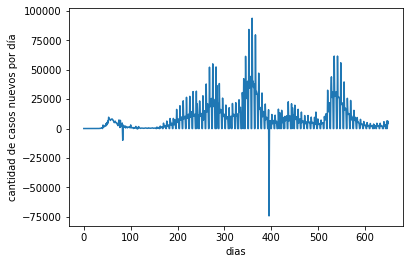

In [61]:
#curva de nuevos casos en China

plt.plot(dias,casos_nuevos_España)
plt.xlabel('dias')
plt.ylabel('cantidad de casos nuevos por día')


In [62]:
#En la fila 112105 del DS existen dos valores en negativo (-10034 y -74347) correspondiente a los casos nuevos del día 24/04/2020 y 02/03/2021. 
#casi con seguridad podria decirse que es un error de tipeo
print(datos_covid.iloc[105786])
print('---------------------------------------------------')
print(datos_covid.iloc[106098])


index                                       111793
Entity                                       Spain
Code                                           ESP
Day                                     2020-04-24
Total_test                                     NaN
Total_confirmed_death_due_to_Covid19         22524
Total_confirmed_cases_of_Covid19            202990
New_cases_of_Covid19                        -10034
Name: 105786, dtype: object
---------------------------------------------------
index                                        112105
Entity                                        Spain
Code                                            ESP
Day                                      2021-03-02
Total_test                                      NaN
Total_confirmed_death_due_to_Covid19          69801
Total_confirmed_cases_of_Covid19        3.13018e+06
New_cases_of_Covid19                         -74347
Name: 106098, dtype: object


In [63]:
casos_principio_España=casos_España[0:60]
dias_principio_España=dias[0:60]

In [64]:
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principio_España, casos_principio_España) 
popt, pcov

(array([  0.14281278, -21.932161  ]), array([[1.22397129e-05, 6.67717568e-03],
        [6.67717568e-03, 3.64993077e+00]]))

In [65]:
k_España=popt[0]
t0_España=popt[1]
casos_simu_España=exponencial(dias_principio_España,k_España,t0_España)
#plt.plot(dias_principio_España,casos_principio_España,'.')
#plt.plot(dias_principio_España,casos_simu_España)

In [66]:
k_España

0.14281277654287505

**Francia**

In [67]:
'''
Francia = datos_covid[datos_covid.Entity.isin(["France"])]
Francia.head(280) #datos del pais
'''

'\nFrancia = datos_covid[datos_covid.Entity.isin(["France"])]\nFrancia.head(280) #datos del pais\n'

Text(0, 0.5, 'cantidad de casos')

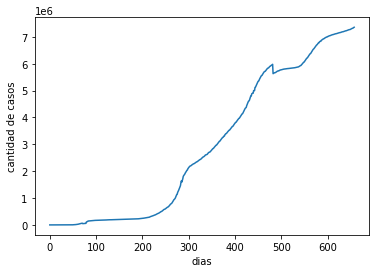

In [68]:
#curva exponencial del curso de la infeccion, casos totales
ind_Francia=np.where(paises=='France')
ind_Francia=ind_Francia[0]
casos_Francia=confirmados[ind_Francia]
casos_nuevos_Francia = casosnuevos[ind_Francia]
dias=np.arange(0,len(casos_Francia))
plt.plot(dias,casos_Francia)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Text(0, 0.5, 'cantidad de casos nuevos por día')

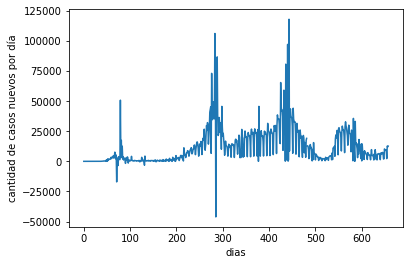

In [69]:
#curva de nuevos casos

plt.plot(dias,casos_nuevos_Francia)
plt.xlabel('dias')
plt.ylabel('cantidad de casos nuevos por día')

In [70]:

Francia = datos_covid[datos_covid.Entity.isin(["France"])]
Francia

,index,Entity,Code,Day,Total_test,Total_confirmed_death_due_to_Covid19,Total_confirmed_cases_of_Covid19,New_cases_of_Covid19
39604,41971,France,FRA,2020-01-24,NaN,NaN,2.0,2.0
39605,41972,France,FRA,2020-01-25,NaN,NaN,3.0,1.0
39606,41973,France,FRA,2020-01-26,NaN,NaN,3.0,0.0
39607,41974,France,FRA,2020-01-27,NaN,NaN,3.0,0.0
39608,41975,France,FRA,2020-01-28,NaN,NaN,4.0,1.0
...,...,...,...,...,...,...,...,...
40257,42624,France,FRA,2021-11-07,NaN,118866.0,7319526.0,8559.0
40258,42625,France,FRA,2021-11-08,NaN,118924.0,7321767.0,2241.0
40259,42626,France,FRA,2021-11-09,NaN,118970.0,7334332.0,12565.0
40260,42627,France,FRA,2021-11-10,NaN,119003.0,7346277.0,11945.0


In [71]:
#En la fila 39889 del DS existe un valor en negativo (-46121) correspondiente a los casos nuevos del día 04/11/2020. 
#casi con seguridad podria decirse que es un error de tipeo
print(datos_covid.iloc[39889])
#Eliminarlo? #Afecta mi columna de interes?

index                                         42256
Entity                                       France
Code                                            FRA
Day                                      2020-11-04
Total_test                                      NaN
Total_confirmed_death_due_to_Covid19          38731
Total_confirmed_cases_of_Covid19        1.59315e+06
New_cases_of_Covid19                         -46121
Name: 39889, dtype: object


In [72]:
casos_principio_Francia=casos_Francia[0:60]
dias_principio_Francia=dias[0:60]

In [73]:
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principio_Francia, casos_principio_Francia) 
popt, pcov

(array([0.17493261, 2.22602566]), array([[7.46660290e-06, 2.32131664e-03],
        [2.32131664e-03, 7.23654763e-01]]))

In [74]:
k_Francia=popt[0]
t0_Francia=popt[1]
casos_simu_Francia=exponencial(dias_principio_Francia,k_Francia,t0_Francia)
#plt.plot(dias_principio_Francia,casos_principio_Francia,'.')
#plt.plot(dias_principio_Francia,casos_simu_Francia)

In [75]:
k_Francia

0.17493261332903814

**Alemania**

In [76]:
'''
Alemania = datos_covid[datos_covid.Entity.isin(["Germany"])]
Alemania.head() #datos del pais
'''

'\nAlemania = datos_covid[datos_covid.Entity.isin(["Germany"])]\nAlemania.head() #datos del pais\n'

In [77]:
#curva exponencial del curso de la infeccion, casos totales
ind_Alemania=np.where(paises=='Germany')
ind_Alemania=ind_Alemania[0]
casos_Alemania=confirmados[ind_Alemania]
casos_nuevos_Alemania = casosnuevos[ind_Alemania]
dias=np.arange(0,len(casos_Alemania))
#plt.plot(dias,casos_Alemania)
#plt.xlabel('dias')
#plt.ylabel('cantidad de casos')

In [78]:
#plt.plot(dias,casos_nuevos_Alemania)
#plt.xlabel('dias')
#plt.ylabel('cantidad de casos nuevos por día')
#los alemanes no fallan

In [79]:
casos_principio_Alemania=casos_Alemania[0:60]
dias_principio_Alemania=dias[0:60]

In [80]:
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principio_Alemania, casos_principio_Alemania) 
popt, pcov

(array([ 0.17004873, -4.12667801]), array([[1.53739834e-05, 5.48388836e-03],
        [5.48388836e-03, 1.96065110e+00]]))

In [81]:
k_Alemania=popt[0]
t0_Alemania=popt[1]
casos_simu_Alemania=exponencial(dias_principio_Alemania,k_Alemania,t0_Alemania)
#plt.plot(dias_principio_Alemania,casos_principio_Alemania,'.')
#plt.plot(dias_principio_Alemania,casos_simu_Alemania)

In [82]:
k_Alemania

0.17004873063172016

**EEUU**

In [83]:
'''
#United States
EEUU = datos_covid[datos_covid.Entity.isin(["United States"])]
EEUU.head() #datos del pais
'''

'\n#United States\nEEUU = datos_covid[datos_covid.Entity.isin(["United States"])]\nEEUU.head() #datos del pais\n'

In [84]:
ind_EEUU=np.where(paises=='United States')
ind_EEUU=ind_EEUU[0]
casos_EEUU=confirmados[ind_EEUU]
casos_nuevos_EEUU = casosnuevos[ind_EEUU]
dias=np.arange(0,len(casos_EEUU))
#plt.plot(dias,casos_EEUU)
#plt.xlabel('dias')
#plt.ylabel('cantidad de casos')

In [85]:
#plt.plot(dias,casos_nuevos_EEUU)
#plt.xlabel('dias')
#plt.ylabel('cantidad de casos nuevos por día')

In [86]:
casos_principio_EEUU=casos_EEUU[0:60]
dias_principio_EEUU=dias[0:60]

In [87]:
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principio_EEUU, casos_principio_EEUU) 
popt, pcov

(array([ 0.33414979, 28.52034216]), array([[1.45671738e-05, 1.28290731e-03],
        [1.28290731e-03, 1.13265040e-01]]))

In [88]:
k_EEUU=popt[0]
t0_EEUU=popt[1]
casos_simu_EEUU=exponencial(dias_principio_EEUU,k_EEUU,t0_EEUU)
#plt.plot(dias_principio_EEUU,casos_principio_EEUU,'.')
#plt.plot(dias_principio_EEUU,casos_simu_EEUU)

In [89]:
k_EEUU

0.3341497918547016

**UK**

In [90]:
'''
#United kingdom
UK = datos_covid[datos_covid.Entity.isin(["United Kingdom"])]
UK.head() #datos del pais
'''

'\n#United kingdom\nUK = datos_covid[datos_covid.Entity.isin(["United Kingdom"])]\nUK.head() #datos del pais\n'

In [91]:
#curva exponencial del curso de la infeccion, casos totales
ind_UK=np.where(paises=='United Kingdom')
ind_UK=ind_UK[0]
casos_UK=confirmados[ind_UK]
casos_nuevos_UK = casosnuevos[ind_UK]
dias=np.arange(0,len(casos_UK))
#plt.plot(dias,casos_UK)
#plt.xlabel('dias')
#plt.ylabel('cantidad de casos')

Text(0, 0.5, 'cantidad de casos nuevos por día UK')

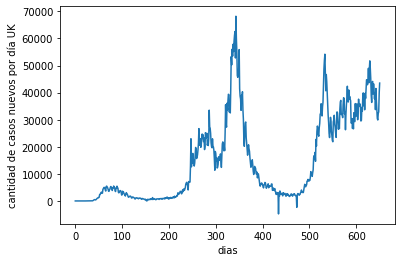

In [92]:
plt.plot(dias,casos_nuevos_UK)
plt.xlabel('dias')
plt.ylabel('cantidad de casos nuevos por día UK')

In [93]:

#UK = datos_covid[datos_covid.Entity.isin(["United Kingdom"])]
#UK

In [94]:
#En las filas 124963 y 125002 del DS existen un valores negativos (-4787 y -2362) correspondientes a los casos nuevos de los días 09/04/2021 y 18/05/2021. 
#casi con seguridad podria decirse que se trata de un error de tipeo
print(datos_covid.iloc[117960])
print("------------------------------------------------------")
print(datos_covid.iloc[117999])


index                                           124963
Entity                                  United Kingdom
Code                                               GBR
Day                                         2021-04-09
Total_test                                 1.18374e+08
Total_confirmed_death_due_to_Covid19            127284
Total_confirmed_cases_of_Covid19           4.38017e+06
New_cases_of_Covid19                             -4787
Name: 117960, dtype: object
------------------------------------------------------
index                                           125002
Entity                                  United Kingdom
Code                                               GBR
Day                                         2021-05-18
Total_test                                 1.53733e+08
Total_confirmed_death_due_to_Covid19            127953
Total_confirmed_cases_of_Covid19           4.46622e+06
New_cases_of_Covid19                             -2362
Name: 117999, dtype: object


In [95]:
casos_principio_UK=casos_UK[0:60]
dias_principio_UK=dias[0:60]

In [96]:
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principio_UK, casos_principio_UK) 
popt, pcov

(array([ 0.15235234, -9.84517595]), array([[5.28004935e-06, 2.28862494e-03],
        [2.28862494e-03, 9.94430204e-01]]))

In [97]:
k_UK=popt[0]
t0_UK=popt[1]
casos_simu_UK=exponencial(dias_principio_UK,k_UK,t0_UK)
#plt.plot(dias_principio_UK,casos_principio_UK,'.')
#plt.plot(dias_principio_UK,casos_simu_UK)

In [98]:
k_UK

0.152352341026043

**Suecia**

In [99]:
'''
#Suecia
Suecia = datos_covid[datos_covid.Entity.isin(["Sweden"])]
Suecia.head()
'''


'\n#Suecia\nSuecia = datos_covid[datos_covid.Entity.isin(["Sweden"])]\nSuecia.head()\n'

In [100]:
ind_Suecia=np.where(paises=='Sweden')
ind_Suecia=ind_Suecia[0]
casos_Suecia=confirmados[ind_Suecia]
casos_nuevos_Suecia = casosnuevos[ind_Suecia]
dias=np.arange(0,len(casos_Suecia))
#plt.plot(dias,casos_Suecia)
#plt.xlabel('dias')
#plt.ylabel('cantidad de casos')

In [101]:
#plt.plot(dias,casos_nuevos_Suecia)
#plt.xlabel('dias')
#plt.ylabel('cantidad de casos nuevos por día Suecia')

In [102]:
casos_principio_Suecia=casos_Suecia[0:60]
dias_principio_Suecia=dias[0:60]

In [103]:
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principio_Suecia, casos_principio_Suecia) 
popt, pcov

(array([  0.10482722, -22.19485649]), array([[5.08979988e-06, 3.73423085e-03],
        [3.73423085e-03, 2.75018482e+00]]))

In [104]:
k_Suecia=popt[0]
t0_Suecia=popt[1]
casos_simu_Suecia=exponencial(dias_principio_Suecia,k_Suecia,t0_Suecia)
#plt.plot(dias_principio_Suecia,casos_principio_Suecia,'.')
#plt.plot(dias_principio_Suecia,casos_simu_Suecia)

In [105]:
k_Suecia

0.1048272154656326

**Rusia**

In [106]:
'''
Rusia = datos_covid[datos_covid.Entity.isin(["Russia"])]
Rusia.head()
'''

'\nRusia = datos_covid[datos_covid.Entity.isin(["Russia"])]\nRusia.head()\n'

In [107]:
#curva exponencial del curso de la infeccion, casos totales
ind_Rusia=np.where(paises=='Russia')
ind_Rusia=ind_Rusia[0]
casos_Rusia=confirmados[ind_Rusia]
casos_nuevos_Rusia = casosnuevos[ind_Rusia]
dias=np.arange(0,len(casos_Rusia))
#plt.plot(dias,casos_Rusia)
#plt.xlabel('dias')
#plt.ylabel('cantidad de casos')

In [108]:
#plt.plot(dias,casos_nuevos_Rusia)
#plt.xlabel('dias')
#plt.ylabel('cantidad de casos')

In [109]:
casos_principio_Rusia=casos_Rusia[0:60]
dias_principio_Rusia=dias[0:60]

In [110]:
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principio_Rusia, casos_principio_Rusia) 
popt, pcov

(array([ 0.20641065, 22.49912798]), array([[2.38588006e-06, 3.99290714e-04],
        [3.99290714e-04, 6.71475547e-02]]))

In [111]:
k_Rusia=popt[0]
t0_Rusia=popt[1]
casos_simu_Rusia=exponencial(dias_principio_Rusia,k_Rusia,t0_Rusia)
#plt.plot(dias_principio_Rusia,casos_principio_Rusia,'.')
#plt.plot(dias_principio_Rusia,casos_simu_Rusia)

In [112]:
k_Rusia

0.20641065332885725

**Paises Bajos**
Hizo cuarentena parcial


In [113]:
'''
PB = datos_covid[datos_covid.Entity.isin(["Netherlands"])]
PB.head()
'''

'\nPB = datos_covid[datos_covid.Entity.isin(["Netherlands"])]\nPB.head()\n'

In [114]:
#curva exponencial del curso de la infeccion, casos totales
ind_PB=np.where(paises=='Netherlands')
ind_PB=ind_PB[0]
casos_PB=confirmados[ind_PB]
casos_nuevos_PB = casosnuevos[ind_PB]
dias=np.arange(0,len(casos_PB))
#plt.plot(dias,casos_PB)
#plt.xlabel('dias')
#plt.ylabel('cantidad de casos')

In [115]:
#plt.plot(dias,casos_nuevos_PB)
#plt.xlabel('dias')
#plt.ylabel('cantidad de casos nuevos por día PB')

In [116]:
casos_principio_PB=casos_PB[0:60]
dias_principio_PB=dias[0:60]

In [117]:
#ajustamos a la funcion
popt, pcov = curve_fit(exponencial, dias_principio_PB, casos_principio_PB) 
popt, pcov

(array([ 5.24970040e-02, -1.45033245e+02]),
 array([[5.65422447e-06, 2.10153381e-02],
        [2.10153381e-02, 7.82810917e+01]]))

In [118]:
k_PB=popt[0]
t0_PB=popt[1]
casos_simu_PB=exponencial(dias_principio_PB,k_PB,t0_PB)
#plt.plot(dias_principio_PB,casos_principio_PB,'.')
#plt.plot(dias_principio_PB,casos_simu_PB)

In [119]:
k_PB

0.05249700396406952

**Portugal**

In [120]:
'''
#Portugal
Portugal = datos_covid[datos_covid.Entity.isin(["Portugal"])]
Portugal.head()

Portugal_2 = Portugal[Portugal.Total_confirmed_cases_of_Covid19.isin([2])]
Portugal_2.head() #para saber cuándo es el primer caso de covid en el pais
#Portugal.head(20)
'''

'\n#Portugal\nPortugal = datos_covid[datos_covid.Entity.isin(["Portugal"])]\nPortugal.head()\n\nPortugal_2 = Portugal[Portugal.Total_confirmed_cases_of_Covid19.isin([2])]\nPortugal_2.head() #para saber cuándo es el primer caso de covid en el pais\n#Portugal.head(20)\n'

In [121]:
#curva exponencial del curso de la infeccion, casos totales
ind_Portugal=np.where(paises=='Portugal')
ind_Portugal=ind_Portugal[0]
casos_Portugal=confirmados[ind_Portugal]
casos_nuevos_Portugal = casosnuevos[ind_Portugal]
dias=np.arange(0,len(casos_Portugal))
#plt.plot(dias,casos_Portugal)
#plt.xlabel('dias')
#plt.ylabel('cantidad de casos')

In [122]:
#plt.plot(dias,casos_nuevos_Portugal)
#plt.xlabel('dias')
#plt.ylabel('cantidad de casos nuevos por día - Portugal')

In [123]:
casos_principio_Portugal=casos_Portugal[0:60] #detecta el primer caso el día 12
dias_principio_Portugal=dias[0:60]

In [124]:
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principio_Portugal, casos_principio_Portugal) 
popt, pcov

(array([ 4.76187460e-02, -1.57685264e+02]),
 array([[7.13384641e-06, 3.09914093e-02],
        [3.09914093e-02, 1.34944256e+02]]))

In [125]:
k_Portugal=popt[0]
t0_Portugal=popt[1]
casos_simu_Portugal=exponencial(dias_principio_Portugal,k_Portugal,t0_Portugal)
#plt.plot(dias_principio_Portugal,casos_principio_Portugal,'.')
#plt.plot(dias_principio_Portugal,casos_simu_Portugal)

In [126]:
k_Portugal

0.047618746019875015

In [127]:
ind_World=np.where(paises=='World')
ind_World=ind_World[0]
casos_World=confirmados[ind_World]
casos_nuevos_World = casosnuevos[ind_World]
dias=np.arange(0,len(casos_World))

In [128]:
casos_principio_World=casos_World[0:60] 
dias_principio_World=dias[0:60]

In [129]:
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principio_World, casos_principio_World) 

k_World=popt[0]
t0_World=popt[1]
casos_simu_World=exponencial(casos_principio_World,k_World,t0_World)

k_World

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.05115048389914402

In [130]:
'''Lsup = 0.19451181183518362
Linf = 0.09967631491892971
k = 0.05115048389914402
if k > Linf and k < Lsup:
  print('cae en el IC')
else:
  print('No cae en el IC')
  '''

"Lsup = 0.19451181183518362\nLinf = 0.09967631491892971\nk = 0.05115048389914402\nif k > Linf and k < Lsup:\n  print('cae en el IC')\nelse:\n  print('No cae en el IC')\n  "

Los métodos estadísticos basados en muestreo repetido (resampling) se engloban dentro de la estadística no paramétrica, ya que no requieren de ninguna asunción sobre la distribución de las poblaciones estudiadas. Son, por lo tanto, una alternativa a los test paramétricos (t-test, anova,…) cuando no se satisfacen sus condiciones o cuando se quiere hacer inferencia sobre un parámetro distinto a la media.
Uno de los métodos de resampling más utilizados: el bootstrapping.
La estrategia de bootstrapping se puede emplear para resolver varios problemas:

Calcular intervalos de confianza de un parámetro poblacional.

Calcular la significancia estadística (p-value) de la diferencia entre 
poblaciones.

Calcular intervalos de confianza para la diferencia entre poblaciones.

El valor K que mide la diferencia de a cuánta gente contagia una persona infectada. Es decir, K es el valor estadístico que nos dice cuánta variación hay en esta distribución.

Por regla general, cuanto más bajo es el número K, menos son los que están transmitiendo la enfermedad a otros.

2. Analizar si es posible estimar la evolución mundial de la pandemia a partir de lo obtenido. Para esto será necesario elaborar un intervalo de confianza para k a partir de los obtenidos y generar un modelo nuevo, basado en la distribución de k. 

  Luego comparar el modelo con los datos mundiales.

In [131]:
from numpy import array

In [132]:
Paises_Norte_K = array([k_Alemania, k_Portugal, k_Canada, k_China, k_EEUU, k_España, k_Francia, k_Italia, k_PB, k_Rusia, k_Suecia, k_UK])
Paises_Norte_K

array([0.17004873, 0.04761875, 0.23030716, 0.02274024, 0.33414979,
       0.14281278, 0.17493261, 0.10163528, 0.052497  , 0.20641065,
       0.10482722, 0.15235234])

In [133]:
#Se crea la funcion 
#Función para calcular el estadístico de interés.    
    #Parametros:
    #x : numpy array: valores de la muestra.
    #Returns: estadístico (media)    
def calcular_estadistico(x):
    estadistico = np.mean(x)
    return(estadistico)

In [134]:
'''
    Función para calcular el valor del estadístico en múltiples muestras generadas
    mediante bootstrapping.
    Parametros
    x : numpy array: muestra.
    fun_estadistico : funcion que recibe como argumento una muestra y devuelve el valor
        del estadístico. en este caso se va a usar 'calcular_estadistico', ya creada.
    n_iteraciones : Número iteraciones (default `9999`).(int)
        
    Returns:
    distribuciones: numpy array con valor del estadístico en cada muestra de bootstrapping.
    '''
def bootstraping(x, fun_estadistico, n_iteraciones=9999): #N_iteraciones = 9999, significa que tomara ese valor como default
    n = len(x) #cada n tiene que ser del mismo tamaño que la muestra experimental; entonces n tiene el tamaño de x
    dist_boot = np.full(shape=n_iteraciones, fill_value=np.nan) #un array del tamaño de n_iteraciones
    #np.full = crear un array con el tamaño que le pase (shape = n_iteraciones) y de entrada cada posiciíon es un nan (se llena despues, con el for loop)
        
    for i in range(n_iteraciones): #esto es: voy a tomar tantas muestras como n_iteraciones. por cada iteracion en el rango de iteraciones
        resample = np.random.choice(x, size=n, replace=True) #Crea una muestra (resample). usa random.choice, sobre x (mis datos), le pasa el tamaño de n, con reemplazo
        dist_boot[i] = fun_estadistico(resample) #a cada resample (a cada iteracion) aplica la funcion_estadistico a cada resample/remuestra
       #cada posición del array dist_boot será el estadístico de cada resample (conjunto de medias, o lo que calcule fun_estadistico)
        
    return dist_boot

In [135]:
#distribucion de bootstraping
dist_boot_norte = bootstraping(
                x = Paises_Norte_K,
                fun_estadistico = calcular_estadistico,
                n_iteraciones   = 9999
            )

In [136]:
# Intervalo IC basado en percentiles de la distribución bootstrapping
# ==============================================================================
# Un IC del 95% debe abarcar desde el cuantil 0.025 al 0.975, porque la suma de los errores da 0.5 (lo que falta de 95 para llegar a 100%)
int_conf_norte_cuantiles = np.quantile(a = dist_boot_norte, q = [0.025, 0.975]) #le paso la distribucion de medias que le pase, y los quantiles (q = )

print('Intervalo de confianza: ', int_conf_norte_cuantiles,'(basado en cuantiles)' )
print('donde', int_conf_norte_cuantiles[0], 'es el límite inferior y ', int_conf_norte_cuantiles[1], 'es el límite superior' )


Intervalo de confianza:  [0.09908868 0.19431783] (basado en cuantiles)
donde 0.099088684829501 es el límite inferior y  0.19431783435571404 es el límite superior


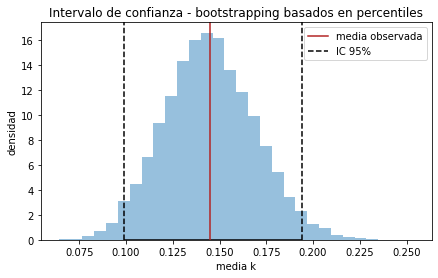

In [137]:
# Gráfico intervalo de confianza del 95%

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,4))
ax.hist(dist_boot_norte, bins=30, density=True, color='#3182bd', alpha=0.5)
ax.axvline(x=dist_boot_norte.mean(), color='firebrick', label='media observada')
ax.axvline(x=int_conf_norte_cuantiles[0], color='black', linestyle='--', label='IC 95%')
ax.axvline(x=int_conf_norte_cuantiles[1], color='black', linestyle='--')
ax.hlines(y=0.001, xmin=int_conf_norte_cuantiles[0], xmax=int_conf_norte_cuantiles[1], color='black')
ax.set_title('Intervalo de confianza - bootstrapping basados en percentiles')
ax.set_xlabel('media k')
ax.set_ylabel('densidad')
ax.legend();

 **hacer un gráfico del intervalo de confianza del k del array Paises_Norte_K**

(array([3., 0., 2., 1., 3., 1., 1., 0., 0., 1.]),
 array([0.02274024, 0.0538812 , 0.08502215, 0.11616311, 0.14730406,
        0.17844502, 0.20958597, 0.24072693, 0.27186788, 0.30300884,
        0.33414979]),
 <a list of 10 Patch objects>)

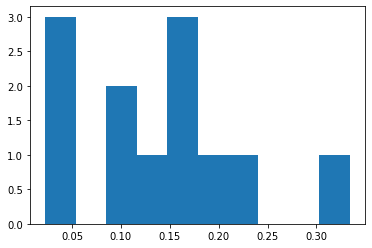

In [138]:
plt.hist(Paises_Norte_K)

In [139]:
#media y DS de la muestra experimental
mu_muestra_paises_norte = np.mean(Paises_Norte_K)
sigma_muestra_paises_norte = np.std(Paises_Norte_K)
print("Media de la muestra de los K de paises del norte (experimental): ", mu_muestra_paises_norte)
print("DS de la muestra de los K de paises del norte (experimental): ", sigma_muestra_paises_norte)

Media de la muestra de los K de paises del norte (experimental):  0.1450277128801472
DS de la muestra de los K de paises del norte (experimental):  0.08410814833181583


In [140]:
#media y DS del array de medias de k (btp)
mu_muestra_2_norte = np.mean(dist_boot_norte)
sigma_muestra_2_norte = np.std(dist_boot_norte)
print("Media de muestra bootstraping: ", mu_muestra_2_norte)
print("DS de muestra bootstraping: ", sigma_muestra_2_norte)


Media de muestra bootstraping:  0.14477486964193187
DS de muestra bootstraping:  0.024281042798888396


In [141]:
#Intervalo de confianza del array de k de paises del norte sin bootstraping

int_conf_norte_cuantiles_2 = np.quantile(a = Paises_Norte_K, q = [0.025, 0.975]) #le paso la distribucion de medias que le pase, y los quantiles (q = )

print('Intervalo de confianza: ', int_conf_norte_cuantiles_2,'(basado en cuantiles)' )
print('donde', int_conf_norte_cuantiles_2[0], 'es el límite inferior y ', int_conf_norte_cuantiles_2[1], 'es el límite superior' )

Intervalo de confianza:  [0.02958183 0.30559307] (basado en cuantiles)
donde 0.02958183103801912 es el límite inferior y  0.30559306711983136 es el límite superior


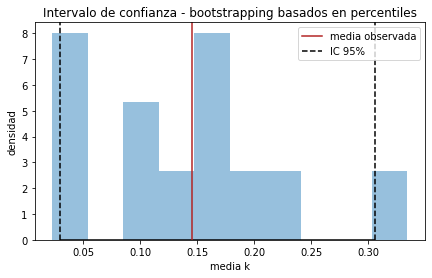

In [142]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,4))
ax.hist(Paises_Norte_K, density=True, color='#3182bd', alpha=0.5)
ax.axvline(x=Paises_Norte_K.mean(), color='firebrick', label='media observada')
ax.axvline(x=int_conf_norte_cuantiles_2[0], color='black', linestyle='--', label='IC 95%')
ax.axvline(x=int_conf_norte_cuantiles_2[1], color='black', linestyle='--')
ax.hlines(y=0.001, xmin=int_conf_norte_cuantiles_2[0], xmax=int_conf_norte_cuantiles_2[1], color='black')
ax.set_title('Intervalo de confianza - bootstrapping basados en percentiles')
ax.set_xlabel('media k')
ax.set_ylabel('densidad')
ax.legend();

**Lo que arroja no tiene relevancia ni validez estadística. Seguimos.**


**Punto d**. 

El k promedio de los paises elegidos sirve para representar a la poblacion mundial?

Para saberlo, se toma el k promedio de la misma cantidad de paises del sur, o aquellos que están en la estación del año contraria, y se compara.

Tambien se coteja con el K_world (datos mundiales)

Paises elegidos del sur: Argentina, Chile, Peru, Brazil, Uruguay, New Zealand, Tonga, South Africa, Rwanda, Paraguay, Bolivia , Zimbabwe

In [143]:
#datos_covid['Entity'].unique()


In [144]:
ind_World=np.where(paises=='World')
ind_World=ind_World[0]
casos_World=confirmados[ind_World]
casos_nuevos_world = casosnuevos[ind_World]
dias=np.arange(0,len(casos_World))
#plt.plot(dias,casos_Chile)
#plt.xlabel('dias')
#plt.ylabel('cantidad de casos')

In [145]:
casos_principio_world=casos_World[0:60]
dias_principio_world=dias[0:60]
popt, pcov = curve_fit(exponencial, dias_principio_world, casos_principio_world) 
popt, pcov

(array([ 5.11504839e-02, -1.84327374e+02]),
 array([[5.45729774e-06, 2.49831506e-02],
        [2.49831506e-02, 1.14554057e+02]]))

In [146]:
k_World=popt[0]
k_World

0.05115048389914402

**Chile**

In [147]:
#Chile = datos_covid[datos_covid.Entity.isin(["Chile"])]
#Chile.head() #datos de Chile


In [148]:
ind_Chile=np.where(paises=='Chile')
ind_Chile=ind_Chile[0]
casos_Chile=confirmados[ind_Chile]
casos_nuevos_Chile = casosnuevos[ind_Chile]
dias=np.arange(0,len(casos_Chile))
#plt.plot(dias,casos_Chile)
#plt.xlabel('dias')
#plt.ylabel('cantidad de casos')

In [149]:
casos_principio_Chile=casos_Chile[0:60]
dias_principio_Chile=dias[0:60]

In [150]:
#popt, pcov = curve_fit(exponencial, dias_principio_PB, casos_principio_PB) 
#popt, pcov

In [151]:
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principio_Chile, casos_principio_Chile) 
popt, pcov

(array([ 7.19400093e-02, -7.34226992e+01]),
 array([[6.00195968e-06, 1.05100758e-02],
        [1.05100758e-02, 1.84594548e+01]]))

In [152]:
k_Chile=popt[0]
#t0_Chile=popt[1]
#casos_simu_Chile=exponencial(dias_principio_Chile,k_Chile,t0_Chile)
#plt.plot(dias_principio_Chile,casos_principio_Chile,'.')
#plt.plot(dias_principio_Chile,casos_simu_Chile)

In [153]:
k_Chile

0.07194000933140807

**Perú**

In [154]:
Peru = datos_covid[datos_covid.Entity.isin(["Peru"])]
Peru.head() #datos de Arg
Peru_2 = Peru[Peru.Total_confirmed_cases_of_Covid19.isin([1])]
Peru_2.head() #para saber cuándo es el primer caso de covid en el pais


,index,Entity,Code,Day,Total_test,Total_confirmed_death_due_to_Covid19,Total_confirmed_cases_of_Covid19,New_cases_of_Covid19
88873,94435,Peru,PER,2020-03-06,287.0,1.0,1.0,1.0
88874,94436,Peru,PER,2020-03-07,364.0,1.0,1.0,0.0


In [155]:
ind_Peru=np.where(paises=='Peru')
ind_Peru=ind_Peru[0]
casos_Peru=confirmados[ind_Peru]
casos_nuevos_Peru = casosnuevos[ind_Peru]
dias=np.arange(0,len(casos_Peru))
#plt.plot(dias,casos_Peru)
#plt.xlabel('dias')
#plt.ylabel('cantidad de casos')

In [156]:
casos_principio_Peru=casos_Peru[66:126]
dias_principio_Peru=dias[66:126]

In [157]:
popt, pcov = curve_fit(exponencial, dias_principio_Peru, casos_principio_Peru) 
popt, pcov

(array([ 2.07052814e-02, -4.91082283e+02]),
 array([[5.42466494e-07, 1.56647747e-02],
        [1.56647747e-02, 4.52636708e+02]]))

In [158]:
k_Peru = popt[0]
k_Peru

0.02070528135658418

**Brasil**

In [159]:
#Brasil = datos_covid[datos_covid.Entity.isin(["Brazil"])]
#Brasil.head() #datos de Brasil


In [160]:
ind_Brasil=np.where(paises=='Brazil')
ind_Brasil=ind_Brasil[0]
casos_Brasil=confirmados[ind_Brasil]
#casos_nuevos_Brasil = casosnuevos[ind_Brasil]
#dias=np.arange(0,len(casos_Brasil))
#plt.plot(dias,casos_Brasil)
#plt.xlabel('dias')
#plt.ylabel('cantidad de casos')

In [161]:
casos_principio_Brasil=casos_Brasil[0:60]
dias_principio_Brasil=dias[0:60]

In [162]:
popt, pcov = curve_fit(exponencial, dias_principio_Brasil, casos_principio_Brasil) 
popt, pcov

(array([  0.08453696, -71.38192348]), array([[3.04224676e-06, 4.49674215e-03],
        [4.49674215e-03, 6.66142625e+00]]))

In [163]:
k_Brasil=popt[0]
k_Brasil

0.08453696326844051

**Uruguay**

In [164]:
#Uruguay = datos_covid[datos_covid.Entity.isin(["Uruguay"])]
#Uruguay.head() #datos de Uruguay


In [165]:
ind_Uruguay=np.where(paises=='Uruguay')
ind_Uruguay=ind_Uruguay[0]
casos_Uruguay=confirmados[ind_Uruguay]

In [166]:
casos_principio_Uruguay=casos_Uruguay[0:60]
dias_principio_Uruguay=dias[0:60]

In [167]:
popt, pcov = curve_fit(exponencial, dias_principio_Uruguay, casos_principio_Uruguay) 
popt, pcov
k_Uruguay=popt[0]
k_Uruguay

0.024545594062593937

**Nueva Zelanda**

In [168]:
#Nueva_Zelanda = datos_covid[datos_covid.Entity.isin(["New Zealand"])]
#Nueva_Zelanda.head() #datos de NZ


In [169]:
ind_NZ=np.where(paises=='New Zealand')
ind_NZ=ind_NZ[0]
casos_NZ=confirmados[ind_NZ]

In [170]:
casos_principio_NZ=casos_NZ[0:60]
dias_principio_NZ=dias[0:60]

In [171]:
popt, pcov = curve_fit(exponencial, dias_principio_NZ, casos_principio_NZ) 
popt, pcov
k_NZ=popt[0]
k_NZ

0.04550722923192587

**Mozambique**

In [172]:
#Mozambique = datos_covid[datos_covid.Entity.isin(["Mozambique"])]
#Mozambique.head() #datos de MZBQ

In [173]:
ind_Mozambique=np.where(paises=='Mozambique')
ind_Mozambique=ind_Mozambique[0]
casos_Mozambique=confirmados[ind_Mozambique]

In [174]:
casos_principio_Mozambique=casos_Mozambique[0:60]
dias_principio_Mozambique=dias[0:60]

In [175]:
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio) 
popt, pcov
k_Mozambique=popt[0]
k_Mozambique


0.05358992244496536

**Sudafrica**

In [176]:
#SA = datos_covid[datos_covid.Entity.isin(["South Africa"])]
#SA.head() 
#SA_2 = SA[SA.Total_confirmed_cases_of_Covid19.isin([1])]
#SA_2.head() 

In [177]:
ind_SA=np.where(paises=='South Africa')
ind_SA=ind_SA[0]
casos_SA=confirmados[ind_SA]

In [178]:
casos_principio_SA=casos_SA[28:88]
dias_principio_SA=dias[28:88]

In [179]:
popt, pcov = curve_fit(exponencial, dias_principio_SA, casos_principio_SA) 
popt, pcov
k_SA=popt[0]
k_SA

0.05569202866426318

**Ruanda**

In [180]:
#Ruanda = datos_covid[datos_covid.Entity.isin(["Rwanda"])]
#Ruanda.head() 

In [181]:
ind_Ruanda=np.where(paises=='Rwanda')
ind_Ruanda=ind_Ruanda[0]
casos_Ruanda=confirmados[ind_Ruanda]

In [182]:
casos_principio_Ruanda=casos_Ruanda[0:60]
dias_principio_Ruanda=dias[0:60]

In [183]:
popt, pcov = curve_fit(exponencial, dias_principio_Ruanda, casos_principio_Ruanda) 
popt, pcov
k_Ruanda=popt[0]
k_Ruanda

0.035975147012443906

**Paraguay**

In [184]:
#Paraguay = datos_covid[datos_covid.Entity.isin(["Paraguay"])]
#Paraguay.head() 

In [185]:
ind_Paraguay=np.where(paises=='Paraguay')
ind_Paraguay=ind_Paraguay[0]
casos_Paraguay=confirmados[ind_Paraguay]

In [186]:
casos_principio_Paraguay=casos_Paraguay[1:61]
dias_principio_Paraguay=dias[1:61]

In [187]:
popt, pcov = curve_fit(exponencial, dias_principio_Paraguay, casos_principio_Paraguay) 
popt, pcov
k_Paraguay=popt[0]
k_Paraguay

0.05029619255738501

**Bolivia**

In [188]:
#Bolivia = datos_covid[datos_covid.Entity.isin(["Bolivia"])]
#Bolivia.head()

In [189]:
ind_Bolivia=np.where(paises=='Bolivia')
ind_Bolivia=ind_Bolivia[0]
casos_Bolivia=confirmados[ind_Bolivia]

In [190]:
casos_principio_Bolivia=casos_Bolivia[0:60]
dias_principio_Bolivia=dias[0:60]

In [191]:
popt, pcov = curve_fit(exponencial, dias_principio_Bolivia, casos_principio_Bolivia) 
popt, pcov
k_Bolivia=popt[0]
k_Bolivia

0.07771140648600834

**Zimbabwe**

In [192]:
#Zimbabwe = datos_covid[datos_covid.Entity.isin(["Zimbabwe"])]
#Zimbabwe.head()

In [193]:
ind_Zimbabwe=np.where(paises=='Zimbabwe')
ind_Zimbabwe=ind_Zimbabwe[0]
casos_Zimbabwe=confirmados[ind_Zimbabwe]

In [194]:
casos_principio_Zimbabwe=casos_Zimbabwe[0:60]
dias_principio_Zimbabwe=dias[0:60]

In [195]:
popt, pcov = curve_fit(exponencial, dias_principio_Zimbabwe, casos_principio_Zimbabwe) 
popt, pcov
k_Zimbabwe=popt[0]
k_Zimbabwe

0.030355299680010817

Argentina, Chile, Peru, Brazil, Uruguay, New Zealand, Mozambique, South Africa, Rwanda, Paraguay, Bolivia , Zimbabwe

In [196]:
Paises_Sur_K = array([k_arg, k_Chile, k_Peru, k_Brasil, k_Uruguay, k_NZ, k_Mozambique, k_SA, k_Ruanda, k_Paraguay,k_Bolivia, k_Zimbabwe])
Paises_Sur_K

array([0.04535294, 0.07194001, 0.02070528, 0.08453696, 0.02454559,
       0.04550723, 0.05358992, 0.05569203, 0.03597515, 0.05029619,
       0.07771141, 0.0303553 ])

In [197]:
dist_boot_sur = bootstraping(
                x = Paises_Sur_K,
                fun_estadistico = calcular_estadistico,
                n_iteraciones   = 9999
            )

**Grafico paises norte**

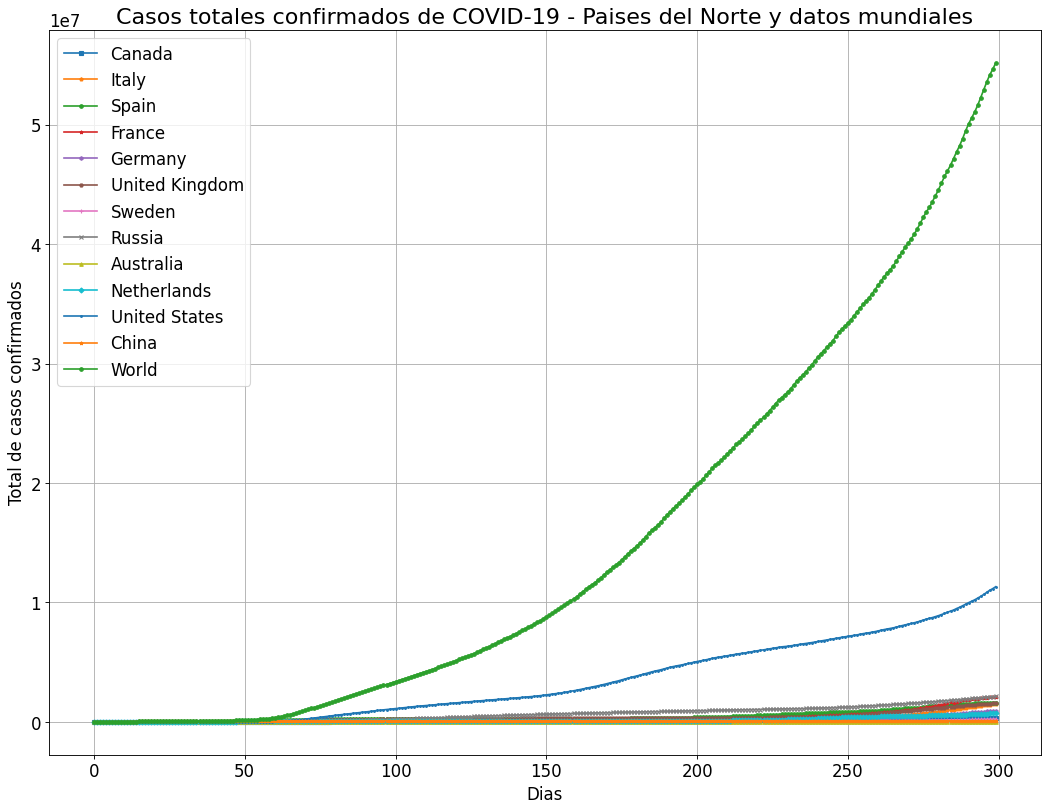

In [255]:

paises_n = ['Canada','Italy', 'Spain', 'France', 'Germany', 'United Kingdom', 'Sweden', 'Russia', 'Australia', 'Netherlands','United States', 'China', 'World']#, 'World' 'Canada',
data_select = datos_covid[(datos_covid['Entity'].isin(paises_n))]

i = 0
scale = 2
plt.figure(figsize=(8*scale, 6*scale), dpi=80)
marks = ["s","p","o","*","h","H","+","x","^","D",".","*","o"]

for pais in paises_n:
   casos_pais = data_select['Total_confirmed_cases_of_Covid19'][(data_select.Entity == pais)][0:300]
   dias = np.arange(casos_pais.shape[0]) 
   plt.plot(dias,casos_pais,label = pais, marker = marks[i], markersize = 3.2)
   i = i + 1

plt.title('Casos totales confirmados de COVID-19 - Paises del Norte y datos mundiales', fontsize = 20)
plt.rc('axes', labelsize =10)
plt.rc('xtick', labelsize=15)   
plt.rc('ytick', labelsize=15)
plt.legend(fontsize = 15)
plt.ylabel('Total de casos confirmados', fontsize = 15)
plt.xlabel('Dias', fontsize = 15)
plt.grid()
plt.show()


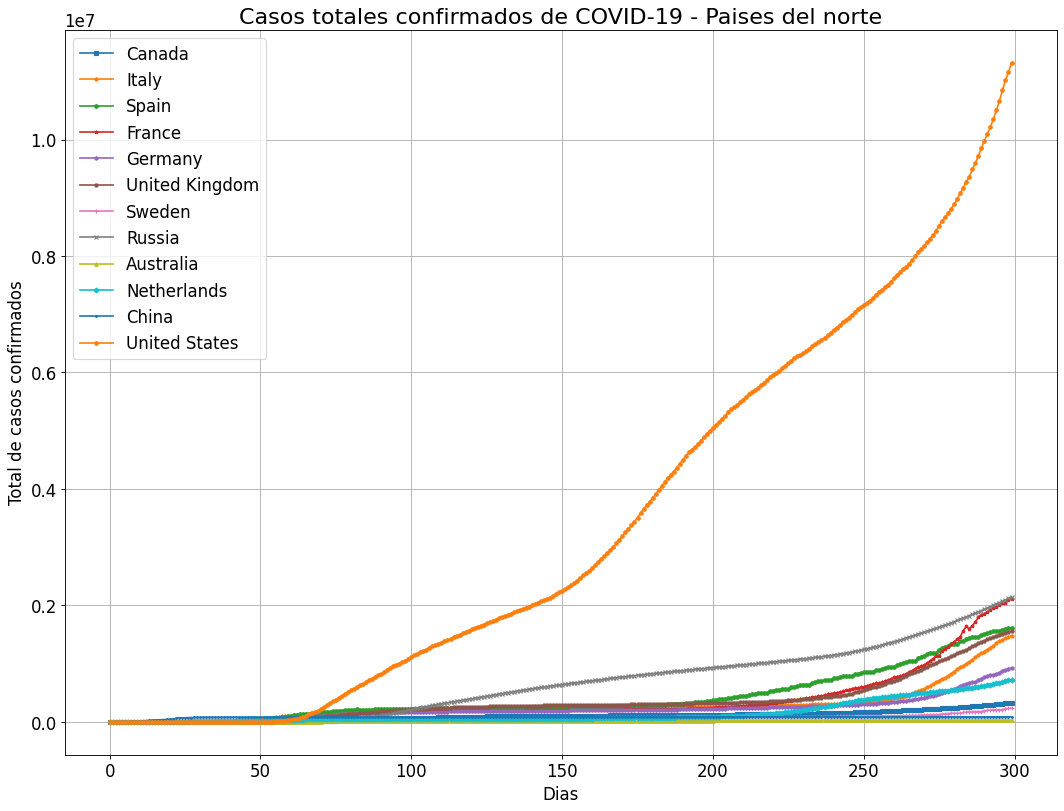

In [256]:
paises_n = ['Canada', 'Italy', 'Spain', 'France', 'Germany', 'United Kingdom', 'Sweden', 'Russia', 'Australia', 'Netherlands', 'China','United States']
data_select = datos_covid[(datos_covid['Entity'].isin(paises_n))]

i = 0
scale = 2
plt.figure(figsize=(8*scale, 6*scale), dpi=80)
marks = ["s","p","o","*","h","H","+","x","^","D",".","o"]

for pais in paises_n:
   casos_pais = data_select['Total_confirmed_cases_of_Covid19'][(data_select.Entity == pais)][0:300]
   dias = np.arange(casos_pais.shape[0]) 
   plt.plot(dias,casos_pais,label = pais, marker = marks[i], markersize = 3.2)
   i = i + 1

plt.title('Casos totales confirmados de COVID-19 - Paises del norte', fontsize = 20)
plt.rc('axes', labelsize =10)
plt.rc('xtick', labelsize=15)   
plt.rc('ytick', labelsize=15)
plt.legend(fontsize = 15)
plt.ylabel('Total de casos confirmados', fontsize = 15)
plt.xlabel('Dias', fontsize = 15)
plt.grid()
plt.show()

En estos graficos se ve que el crecimiento (primeros 300 dias) de la curva correspodiente a lo datos mundiales esta por encima del resto de los paises del mundo, de forma notoria, seguido por EEUU (en el segundo gráfico se ve mas claramente la diferencia de este ultimo con el resto de los paises)

**Gráficos paises sur**

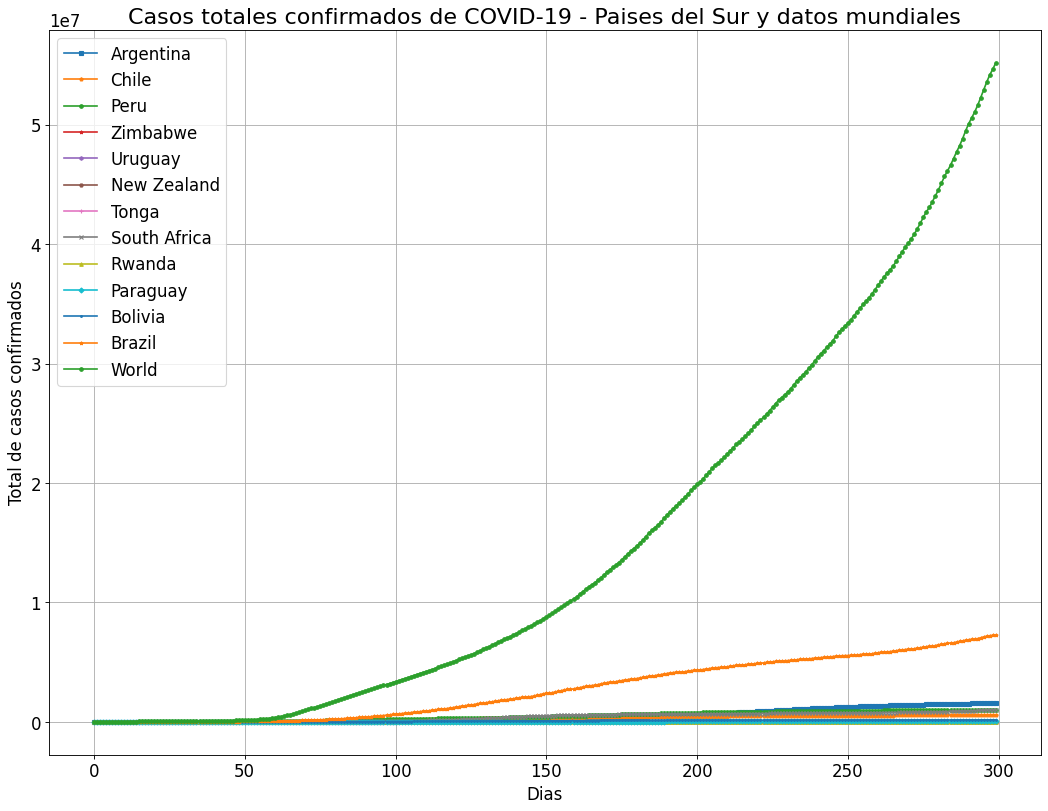

In [257]:

paises = ['Argentina', 'Chile', 'Peru', 'Zimbabwe', 'Uruguay', 'New Zealand', 'Tonga', 'South Africa', 'Rwanda', 'Paraguay', 'Bolivia','Brazil', 'World']
data_2_select = datos_covid[(datos_covid['Entity'].isin(paises))]
#data_2_world  = data_2[(data_2['Entity'].isin(['World']))]

i = 0
scale = 2
plt.figure(figsize=(8*scale, 6*scale), dpi=80)
marks = ["s","p","o","*","h","H","+","x","^","D",".","*","o"]

for pais in paises:
   casos_pais = data_2_select['Total_confirmed_cases_of_Covid19'][(data_2_select.Entity == pais)][0:300]
   dias = np.arange(casos_pais.shape[0]) 
   plt.plot(dias,casos_pais,label = pais, marker = marks[i], markersize = 3.2)
   i = i + 1

plt.title('Casos totales confirmados de COVID-19 - Paises del Sur y datos mundiales', fontsize = 20)
plt.rc('axes', labelsize =10)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)
plt.legend(fontsize = 15)
plt.ylabel('Total de casos confirmados', fontsize = 15)
plt.xlabel('Dias', fontsize = 15)
plt.grid()
plt.show()

La tendencia se repite en cuanto a los paises del sur en relacion con los datos mundiales.

**Grafico mundo**

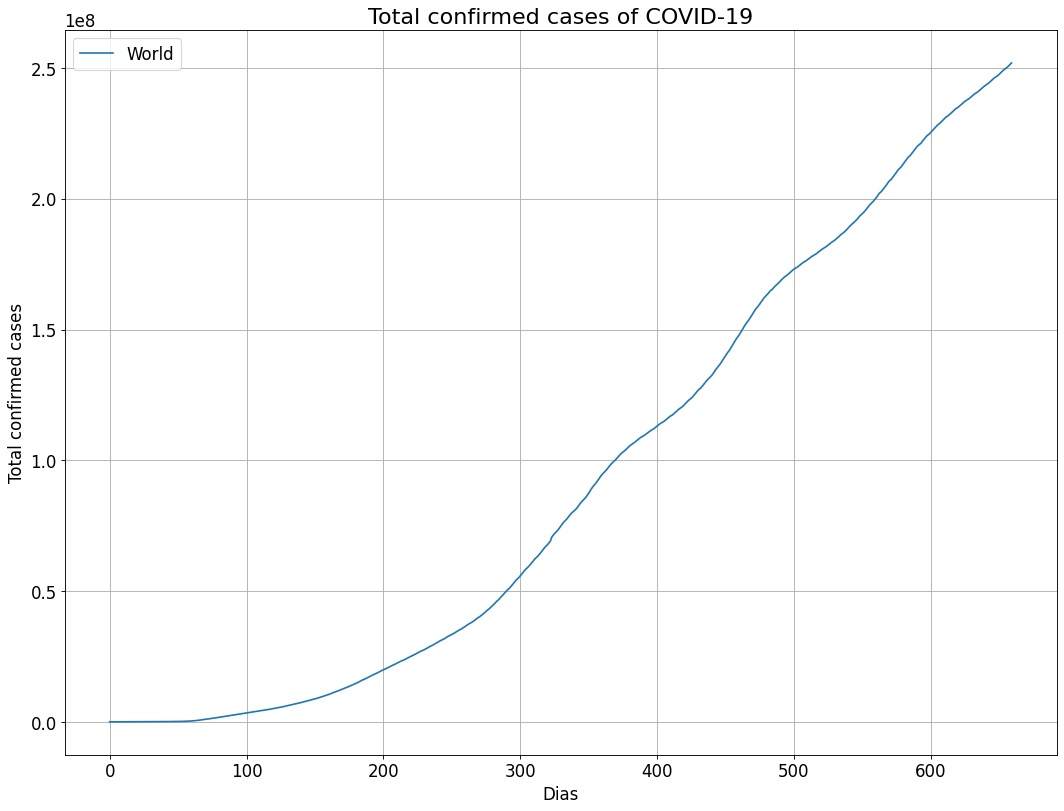

In [201]:
datos_world  = datos_covid[(datos_covid['Entity'].isin(['World']))]

casos_world = datos_world['Total_confirmed_cases_of_Covid19']
dias = np.arange(casos_world.shape[0]) 

plt.figure(figsize=(8*scale, 6*scale), dpi=80)
plt.plot(dias,casos_world, label = 'World')
plt.title('Total confirmed cases of COVID-19', fontsize = 20)
plt.rc('axes', labelsize =10)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)
plt.legend(fontsize = 15)
plt.ylabel('Total confirmed cases', fontsize = 15)
plt.xlabel('Dias', fontsize = 15)
plt.grid()
plt.show()

**Intervalos de confianza**

**Sur**

In [202]:
# Intervalo IC basado en percentiles de la distribución bootstrapping
# ==============================================================================
# Un IC del 95% debe abarcar desde el cuantil 0.025 al 0.975, porque la suma de los errores da 0.5 (lo que falta de 95 para llegar a 100%)
int_conf_cuantiles_sur = np.quantile(a = dist_boot_sur, q = [0.025, 0.975]) #le paso la distribucion de medias que le pase, y los quantiles (q = )

print('Intervalo de confianza: ', int_conf_cuantiles_sur,'(basado en cuantiles)' )
print('donde', int_conf_cuantiles_sur[0], 'es el límite inferior y ', int_conf_cuantiles_sur[1], 'es el límite superior' )

Intervalo de confianza:  [0.03889733 0.06111514] (basado en cuantiles)
donde 0.03889733074893295 es el límite inferior y  0.06111513795330683 es el límite superior


In [203]:
'''
lim_sup = 0.06117177449244847
lim_inf = 0.03911071516747442

if k_World > lim_inf and k_World < lim_sup:
  print('El k del mundo cae dentro del intervalo de confianza')
else:
  print('El k del mundo No cae dentro del intervalo de confianza')
'''

"\nlim_sup = 0.06117177449244847\nlim_inf = 0.03911071516747442\n\nif k_World > lim_inf and k_World < lim_sup:\n  print('El k del mundo cae dentro del intervalo de confianza')\nelse:\n  print('El k del mundo No cae dentro del intervalo de confianza')\n"

**Norte**

In [204]:
# Intervalo IC basado en percentiles de la distribución bootstrapping
# ==============================================================================
# Un IC del 95% debe abarcar desde el cuantil 0.025 al 0.975, porque la suma de los errores da 0.5 (lo que falta de 95 para llegar a 100%)
cuantiles = np.quantile(a = dist_boot_norte, q = [0.025, 0.975]) #le paso la distribucion de medias que le pase, y los quantiles (q = )

print('Intervalo de confianza: ', cuantiles,'(basado en cuantiles)' )
print('donde', cuantiles[0], 'es el límite inferior y ', cuantiles[1], 'es el límite superior' )

Intervalo de confianza:  [0.09908868 0.19431783] (basado en cuantiles)
donde 0.099088684829501 es el límite inferior y  0.19431783435571404 es el límite superior


A simple vista, no habria evidencia estadística de que el promedio de K de los paises del norte es representativo de los paises del sur

In [205]:
#media y DS de la muestra experimental
mu_muestra_paises_sur = np.mean(Paises_Sur_K)
sigma_muestra_paises_sur = np.std(Paises_Sur_K)
print("Media de la muestra de los K de paises del sur (experimental): ", mu_muestra_paises_sur)
print("DS de la muestra de los K de paises del sur (experimental): ", sigma_muestra_paises_sur)

Media de la muestra de los K de paises del sur (experimental):  0.049684001506404486
DS de la muestra de los K de paises del sur (experimental):  0.019614540283634036


In [206]:
#media y DS de la muestra bootstraping
mu_muestra_paises_sur_2 = np.mean(dist_boot_sur)
sigma_muestra_paises_sur_2 = np.std(dist_boot_sur)
print("Media de la muestra de los K de paises del sur (bootstraping): ", mu_muestra_paises_sur_2)
print("DS de la muestra de los K de paises del sur (bootstraping): ", sigma_muestra_paises_sur_2)

Media de la muestra de los K de paises del sur (bootstraping):  0.049769924202022364
DS de la muestra de los K de paises del sur (bootstraping):  0.005638806918734702


In [207]:
mu_muestra_paises_norte, mu_muestra_paises_sur

(0.1450277128801472, 0.049684001506404486)

In [208]:
mu_muestra_2_norte, mu_muestra_paises_sur_2

(0.14477486964193187, 0.049769924202022364)

el promedio de k de los paises del norte y del sur difieren . 
Veamos con un test de hipótesis si el promedio de k de los paises del norte es representativo del resto de los paises 

H1 = Las medias de ambos son similares, lo que arroja que la media de los k de los paises del norte es representativa

H0 = Las medias no son similares, lo que arroja que la media de los k de los paises del norte no es representativa

In [258]:
import numpy as np
import pandas as pd
from scipy.stats import t
import scipy 

 
def mean_difference(data1, data2, alpha): # Función: utilice el nivel de significancia de alfa para comprobar si existe una diferencia significativa entre las dos medias de población
#la funcion recibe estos datos = muestra 1 y 2 (a comprara) y el nivel de significancia (alpha)
    
    n1 = len(data1)
    n2 = len(data2)
    
    x1_mean = np.mean(data1)
    x2_mean = np.mean(data2)
    
    x1_var = np.var(data1, ddof=1) 
    x2_var = np.var(data2, ddof=1) 
    
         # f grados de libertad
    f = np.power((x1_var/n1 + x2_var/n2), 2) / ((np.power((x1_var/n1), 2)/(n1-1)) + (np.power((x2_var/n2), 2)/(n2-1)))
    t_score = scipy.stats.t.isf (alpha, df = int (f)) # valor crítico de la distribución t
         # Prueba estadística t valor
    t_value = ((x1_mean - x2_mean)-(0)) / np.sqrt((x1_var/n1) + (x2_var/n2))
    
    if abs(t_value) > abs(t_score):
        result = 'Acepta H1, rechaza H0'
    else:
        result = 'Acepta H0, rechaza H1'
        
    return t_score, t_value ,result #devuelve el t_score, t_value y el resultado según las hipotesis planteadas


print(mean_difference(dist_boot_norte, dist_boot_sur, 0.05))
  


(1.644991249764964, 381.0915522470336, 'Acepta H1, rechaza H0')


Otra manera de hacer prueba de hipotesis (T_value)

In [210]:
n_dist_boot_norte = len(dist_boot_norte)
media_dist_boot_norte = dist_boot_norte.mean()
std_dist_boot_norte = dist_boot_norte.std()
print('Remuestreo = K Paises del Norte')
print('N (tamaño): ', n_dist_boot_norte)
print('Media: ', media_dist_boot_norte)
print('Desviación estándar: ', std_dist_boot_norte)
print()
n_dist_boot_sur = len(dist_boot_sur)
media_dist_boot_sur = dist_boot_sur.mean()
std_dist_boot_sur = dist_boot_sur.std()
print('Remuestreo = K Paises del Sur')
print('N (tamaño): ', n_dist_boot_sur)
print('Media: ', media_dist_boot_sur)
print('Desviación estándar: ', std_dist_boot_sur)

Remuestreo = K Paises del Norte
N (tamaño):  9999
Media:  0.14477486964193187
Desviación estándar:  0.024281042798888396

Remuestreo = K Paises del Sur
N (tamaño):  9999
Media:  0.049769924202022364
Desviación estándar:  0.005638806918734702


In [211]:
# HIPOTESIS
#H0 = Las medias de ambos son similares, lo que arroja que existe evidencia estadística de que la media de los k de los paises del norte es representativa
#H1 = Las medias no son similares, lo que arroja que no existe evidencia estadística de que la media de los k de los paises del norte es representativa

alpha = 0.05
confianza = 1 - alpha

In [212]:
from scipy import stats
import math

In [213]:
norte = std_dist_boot_norte / math.sqrt(n_dist_boot_norte) * stats.t.ppf((1 + confianza) / 2, n_dist_boot_norte - 1)

In [214]:
sur = std_dist_boot_sur / math.sqrt(n_dist_boot_sur) * stats.t.ppf((1 + confianza) / 2, n_dist_boot_sur - 1)

In [215]:
print('Intervalo de Confianza - Norte: ', media_dist_boot_norte - norte, media_dist_boot_norte + norte)
print('Intervalo de Confianza - Sur: ', media_dist_boot_sur - sur, media_dist_boot_sur + sur)

Intervalo de Confianza - Norte:  0.14429888852875372 0.14525085075511002
Intervalo de Confianza - Sur:  0.04965938670919694 0.04988046169484779


In [216]:
tprueba, pvalue = stats.ttest_ind(dist_boot_norte, dist_boot_sur, equal_var = False)

In [217]:
#print('t-prueba = ', tprueba)
print('p-value = ', pvalue)

p-value =  0.0


In [259]:
if pvalue >= alpha: 
    print('Las medias de ambos son similares (acepta H0)') 
else: 
    print('Las medias no son similares (rechaza H0)')

Las medias no son similares (rechaza H0)


**Otra manera es chequear si el K mundial cae dentro del intervalo de confianza de los paises del norte y o paieses del sur**

####**Norte**

In [219]:
k_min = int_conf_norte_cuantiles[0]
k_max = int_conf_norte_cuantiles[1]

print('El límite inferior del intervalo de confianza de paises del norte es: ', int_conf_norte_cuantiles[0])
print('El límite superior del intervalo de confianza de paises del norte es: ', int_conf_norte_cuantiles[1])
print('El k del mundo es :', k_World)
print('---------------------------------------------------------------------------------------')


if k_World > k_min and k_World < k_max:
  print("El K del mundo cae dentro del intervalo de confianza de la muestra de paises del norte")
else:
  print("El K del mundo no cae dentro del intervalo de confianza de la muestra de k de paises del norte")


El límite inferior del intervalo de confianza de paises del norte es:  0.099088684829501
El límite superior del intervalo de confianza de paises del norte es:  0.19431783435571404
El k del mundo es : 0.05115048389914402
---------------------------------------------------------------------------------------
El K del mundo no cae dentro del intervalo de confianza de la muestra de k de paises del norte


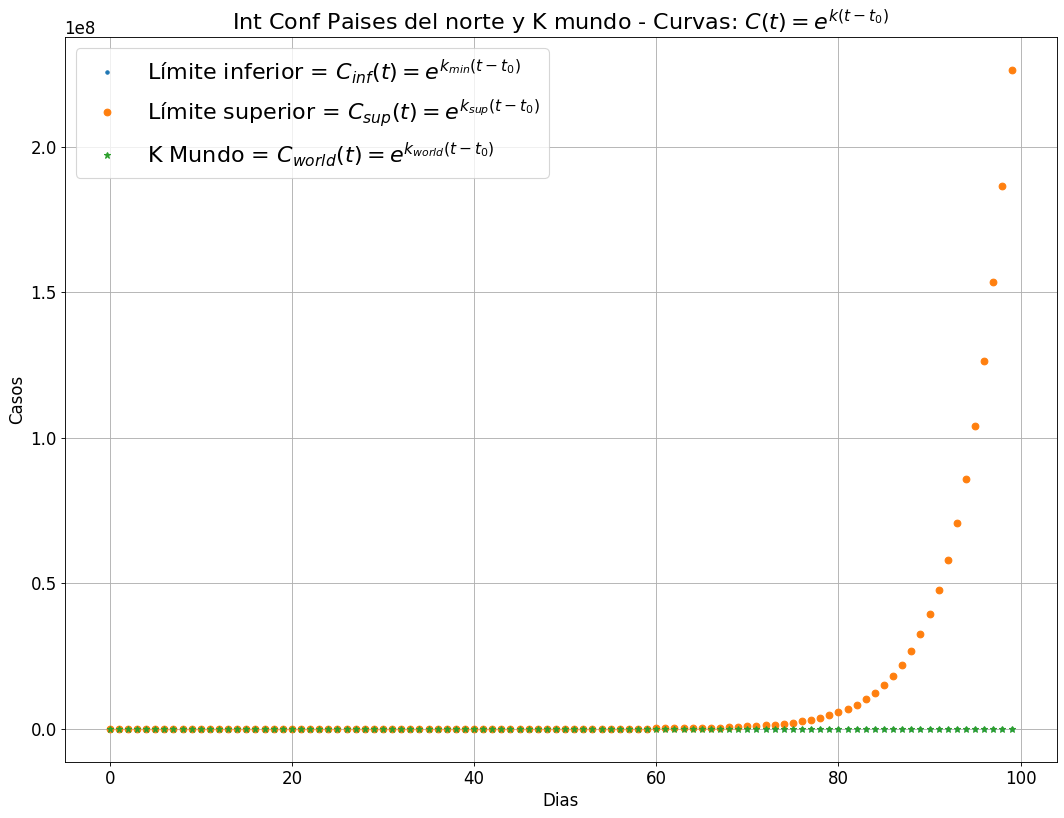

In [220]:
# Graficos de curvas:
k_min = int_conf_norte_cuantiles[0]
k_max = int_conf_norte_cuantiles[1]
k_mundo = k_World

dias_principio = np.arange(0,100)

casos_simu_min=exponencial(dias_principio,k_min,0)
casos_simu_max=exponencial(dias_principio,k_max,0)
casos_simu_world=exponencial(dias_principio,k_mundo,0)

plt.figure(figsize=(8*scale, 6*scale), dpi=80)
plt.plot(dias_principio,casos_simu_min,'.', label = 'Límite inferior = $C_{inf}(t)=e^{k_{min}(t-t_0)}$')
plt.plot(dias_principio,casos_simu_max,'o', label = 'Límite superior = $C_{sup}(t)=e^{k_{sup}(t-t_0)}$')
plt.plot(dias_principio,casos_simu_world,'*', label = 'K Mundo = $C_{world}(t)=e^{k_{world}(t-t_0)}$')
plt.title('Int Conf Paises del norte y K mundo - Curvas: $C(t)=e^{k(t-t_0)}$',fontsize = 20)
plt.rc('axes', labelsize =10)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)
plt.xlabel('Dias',fontsize = 15)
plt.ylabel('Casos',fontsize = 15)
plt.legend(fontsize = 20)
plt.grid()
plt.show()

###**Qué pasa, en cambio, si tomo la muestra de paises del sur?:**

In [221]:
k_min_sur = int_conf_cuantiles_sur[0]
k_max_sur = int_conf_cuantiles_sur[1]

print('El límite inferior del intervalo de confianza de paises del norte es: ', int_conf_cuantiles_sur[0])
print('El límite superior del intervalo de confianza de paises del norte es: ', int_conf_cuantiles_sur[1])
print('El k del mundo es :', k_World)
print('---------------------------------------------------------------------------------------')


if k_World > k_min_sur and k_World < k_max_sur:
  print("El K del mundo cae dentro del intervalo de confianza de la muestra de paises del sur")
else:
  print("El K del mundo no cae dentro del intervalo de confianza de la muestra de k de paises del sur")

El límite inferior del intervalo de confianza de paises del norte es:  0.03889733074893295
El límite superior del intervalo de confianza de paises del norte es:  0.06111513795330683
El k del mundo es : 0.05115048389914402
---------------------------------------------------------------------------------------
El K del mundo cae dentro del intervalo de confianza de la muestra de paises del sur


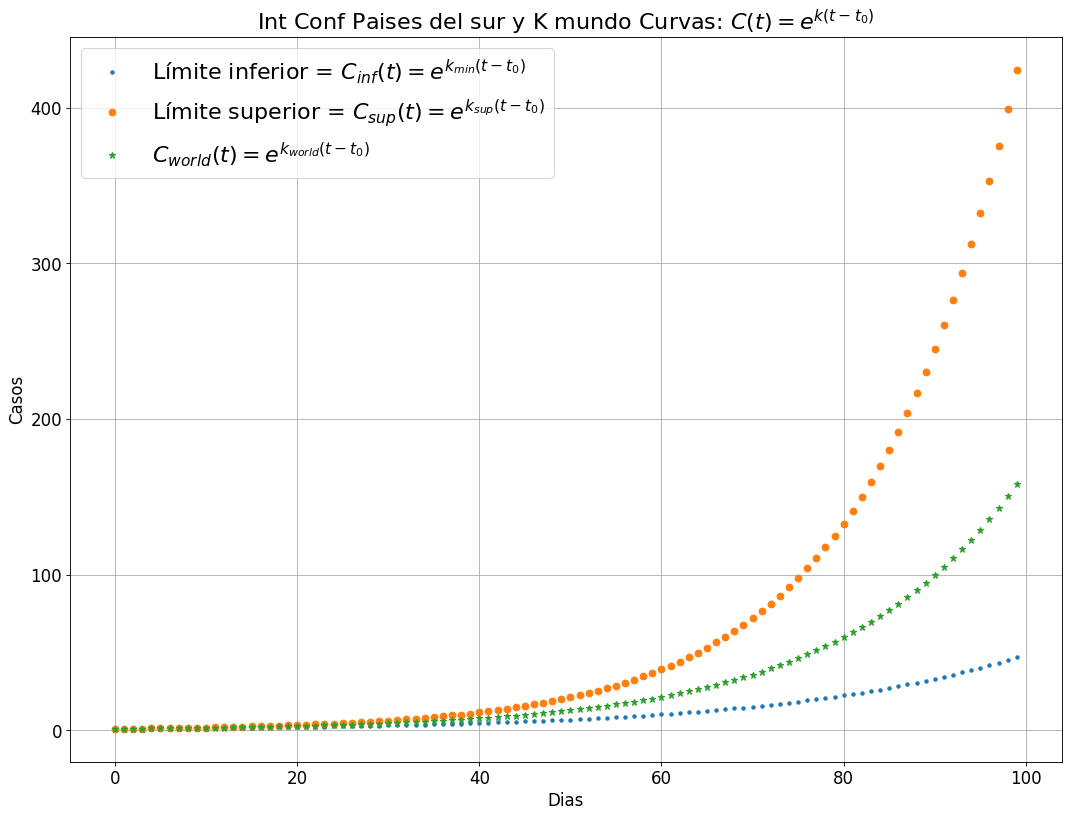

In [222]:

dias_principio = np.arange(0,100)

casos_simu_min_sur=exponencial(dias_principio,k_min_sur,0)
casos_simu_max_sur=exponencial(dias_principio,k_max_sur,0)
casos_simu_world=exponencial(dias_principio,k_mundo,0)

plt.figure(figsize=(8*scale, 6*scale), dpi=80)
plt.plot(dias_principio,casos_simu_min_sur,'.', label = 'Límite inferior = $C_{inf}(t)=e^{k_{min}(t-t_0)}$')
plt.plot(dias_principio,casos_simu_max_sur,'o', label = 'Límite superior = $C_{sup}(t)=e^{k_{sup}(t-t_0)}$')
plt.plot(dias_principio,casos_simu_world,'*', label = '$C_{world}(t)=e^{k_{world}(t-t_0)}$')
plt.title('Int Conf Paises del sur y K mundo Curvas: $C(t)=e^{k(t-t_0)}$',fontsize = 20)
plt.rc('axes', labelsize =10)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)
plt.xlabel('Dias',fontsize = 15)
plt.ylabel('Casos',fontsize = 15)
plt.legend(fontsize = 20)
plt.grid()
plt.show()

En cuanto al IC de los K de los paises del Sur, el K mundial cae en el intervalo de confianza


###**Segunda parte**

**Evaluando estrategias**

Ahora que tienes una manera de obtener información de las curvas, puedes intentar evaluar las estrategias de acción y el comportamiento de las poblaciones, construyendo un clasificador binario.

------------------------------------------------------------------------------

4. Elige una categoría binaria que hable de políticas públicas elegidas por los países para enfrentar la pandemia que te interese estudiar, como pueden ser "la población hizo cuarententa" o "la población se vacunó".

Cuarentena: No todos los paises tomaron las mismas medidas respecto de la pandemia. Tomamos como ejemplo paises que hicieron o no cuarentena.

5. Piensa qué indicadores de la curva pueden hablar del éxito de la política que quieres estudiar. Por ejemplo, si se tratase de evaluar el éxito de una cuarentena podría ser porcentaje de población que se contagió o variación del valor de k a partir de que se empezó a implementar esa medida. Elige al menos 3 indicadores.



Selecciono 3 indicadores

* k de muertes: k_muertes
* k de contagios: k_contagios
* Muertes por COVID19 = muertes/casos confirmados.


6. Investiga sobre países que hayan aplicado o no esa política pública, para generar una base de datos. Por ejemplo, Brasil no hizo cuarentena y China hizo una muy estricta. Recuerda hacer una selección inteligente de la porción de datos de la curva de cada país que vas a analizar.

In [223]:
## países con y sin cuarentena:
#no = 0
#si = 1


no = ['Mexico','Sweden','India','Bolivia','Brazil','Uruguay','Netherlands', 'United Kingdom']
si = ['Argentina','China', 'Portugal','Spain', 'Chile', 'Italy','France','Australia' ]
paises_elegidos = ['Mexico','Sweden','India','Bolivia','Brazil','Uruguay','Netherlands', 'United Kingdom','Argentina','China', 'Portugal','Spain', 'Chile', 'Italy','France','Australia']
cuarentena = [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]

In [224]:
# Se genera un DF vacío con todos los países seleccionados:
datos = {'Pais': paises_elegidos, 'k_muertes': np.zeros(len(paises_elegidos)), 'k_contagios': np.zeros(len(paises_elegidos)), 'muertes/casos': np.zeros(len(paises_elegidos)),'target': cuarentena}  
Covid= pd.DataFrame(datos)
Covid

,Pais,k_muertes,k_contagios,muertes/casos,target
0,Mexico,0.0,0.0,0.0,0
1,Sweden,0.0,0.0,0.0,0
2,India,0.0,0.0,0.0,0
3,Bolivia,0.0,0.0,0.0,0
4,Brazil,0.0,0.0,0.0,0
5,Uruguay,0.0,0.0,0.0,0
6,Netherlands,0.0,0.0,0.0,0
7,United Kingdom,0.0,0.0,0.0,0
8,Argentina,0.0,0.0,0.0,1
9,China,0.0,0.0,0.0,1


In [225]:
df_covid = pd.DataFrame({'Paises': ['Mexico','Sweden','India','Bolivia','Brazil','Uruguay','Netherlands', 'United Kingdom','Argentina','China', 'Portugal','Spain', 
                                    'Chile', 'Italy','France','Australia'],
                         'Cuarentena': ['No','No','No','No','No','No','No','No','Si','Si','Si','Si','Si','Si','Si','Si']})


df_covid = df_covid.sample(frac=True).reset_index(drop=True)
df_covid 

,Paises,Cuarentena
0,Argentina,Si
1,Sweden,No
2,Chile,Si
3,Bolivia,No
4,France,Si
5,Spain,Si
6,Mexico,No
7,United Kingdom,No
8,Italy,Si
9,Brazil,No


In [226]:
# Cálculo de las k:
# Las voy a calcular en función de los datos de:
cases = 'Total_confirmed_cases_of_Covid19'
deaths = 'Total_confirmed_death_due_to_Covid19'

In [227]:
## países con y sin cuarentena:
#no = 0
#si = 1
no = ['Mexico','Sweden','India','Bolivia','Brazil','Uruguay','Netherlands', 'United Kingdom']
si = ['Argentina','China', 'Portugal','Spain', 'Chile', 'Italy','France','Australia' ]
paises_elegidos = ['Mexico','Sweden','India','Bolivia','Brazil','Uruguay','Netherlands', 'United Kingdom','Argentina','China', 'Portugal','Spain', 'Chile', 'Italy','France','Australia']
cuarentena = [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]

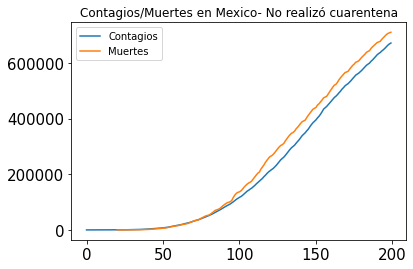

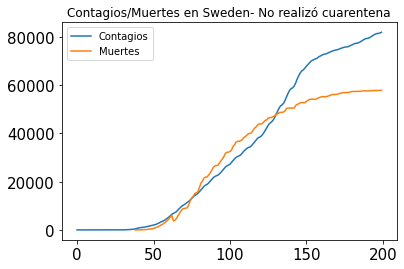

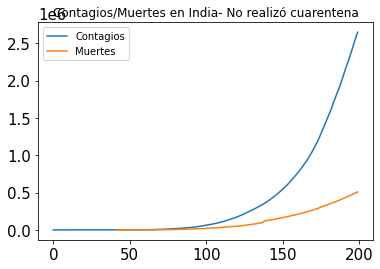

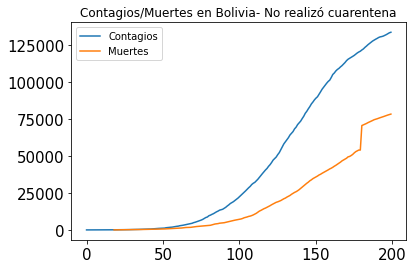

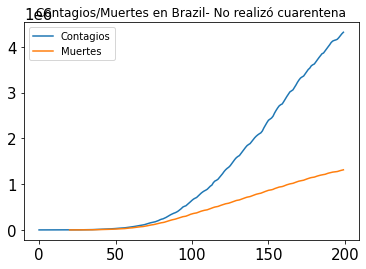

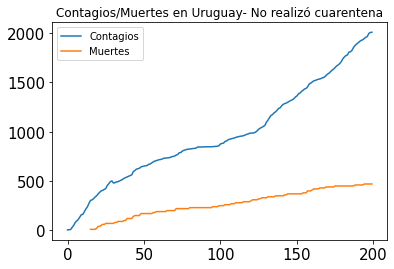

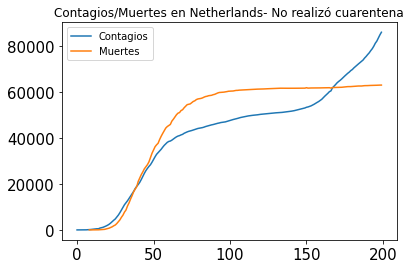

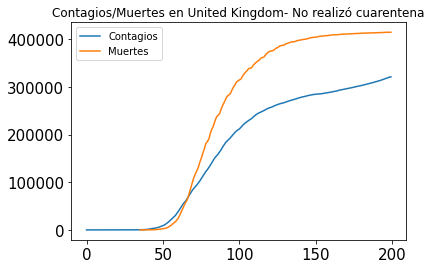

In [228]:
#Paises que NO realizaron cuarentena estricya desde el principio
i = 0
paises = no
for pais in paises:
  casos_pais = datos_covid['Total_confirmed_cases_of_Covid19'][(datos_covid.Entity == pais)][0:200]
  muertes_pais = datos_covid['Total_confirmed_death_due_to_Covid19'][(datos_covid.Entity == pais)][0:200]
  dias = np.arange(casos_pais.shape[0]) 
  plt.figure(i)
  plt.plot(dias,casos_pais,label = 'Contagios')
  plt.title(' Casos en '+ pais)
  plt.legend()

  plt.figure(i)
  plt.plot(dias,muertes_pais*10,label = 'Muertes')
  plt.title('Contagios/Muertes en '+ pais + '- No realizó cuarentena')
  plt.legend()
  plt.show()
  i = i + 1

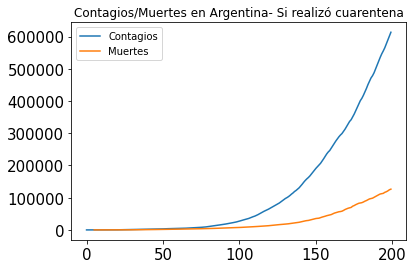

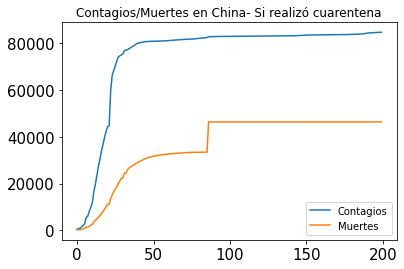

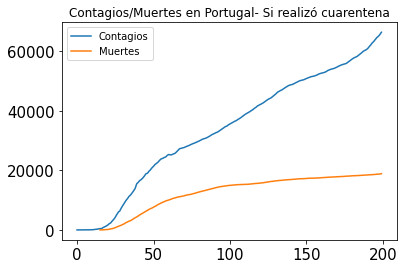

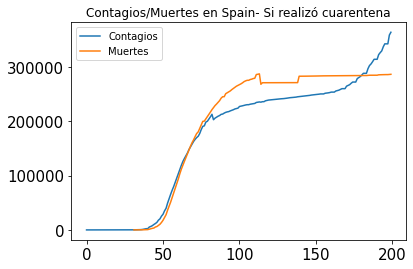

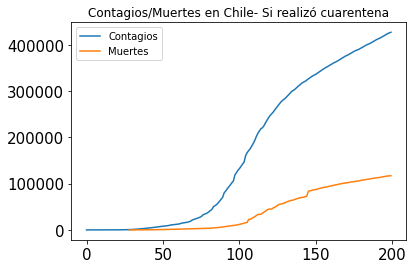

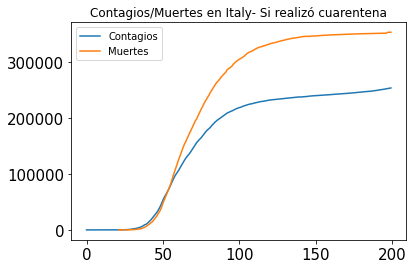

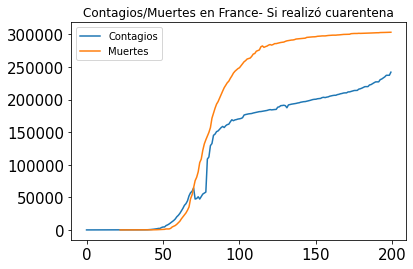

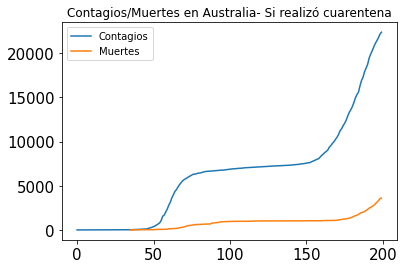

In [229]:
#Paises que realizaron cuarentena estricta desde el principio
i = 0
paises = si
for pais in paises:
  casos_pais = datos_covid['Total_confirmed_cases_of_Covid19'][(datos_covid.Entity == pais)][0:200]
  muertes_pais = datos_covid['Total_confirmed_death_due_to_Covid19'][(datos_covid.Entity == pais)][0:200]
  dias = np.arange(casos_pais.shape[0]) 
  plt.figure(i)
  plt.plot(dias,casos_pais,label = 'Contagios')
  plt.title(' Casos en '+ pais)
  plt.legend()

  plt.figure(i)
  plt.plot(dias,muertes_pais*10,label = 'Muertes')
  plt.title('Contagios/Muertes en '+ pais + '- Si realizó cuarentena')
  plt.legend()
  plt.show()
  i = i + 1

In [230]:
#Se calcula el k y raios segun indicadores elegidos de cada uno de los países.
# Uso un fiteo por cuadrados mínimos exponencial:
# Lo hago para todos los países.

#no = ['Mexico','Sweden','India','Bolivia','Brazil','Uruguay','Netherlands', 'United Kingdom']
#si = ['Argentina','China', 'Portugal','Spain', 'Chile', 'Italy','France','Australia' ]
paises_elegidos = ['Mexico','Sweden','India','Bolivia','Brazil','Uruguay','Netherlands', 'United Kingdom','Argentina','China', 'Portugal','Spain', 'Chile', 'Italy','France','Australia']
#cuarentena = [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]
#cases = 'Total_confirmed_cases_of_Covid19'
#deaths = 'Total_confirmed_death_due_to_Covid19'

paises = paises_elegidos
i = 0
for pais in paises:
    casos_pais = datos_covid['Total_confirmed_cases_of_Covid19'][(datos_covid.Entity == pais)][200:401]
    muertes_pais = datos_covid['Total_confirmed_death_due_to_Covid19'][(datos_covid.Entity == pais)][200:401]
    muertes_casos = np.mean(muertes_pais)/np.mean(casos_pais)
    dias = np.arange(200,401) 
    popt_casos , pcov_casos  = curve_fit(exponencial, dias, casos_pais, maxfev = 2000)       # Fiteo las exponenciales de casos.
    popt_muertes , pcov_muertes  = curve_fit(exponencial, dias, muertes_pais, maxfev = 2000)     # Fiteo las exponenciales de muertes.
    # Inserto los datos al df que voy a usar para hacer el modelo:
    Covid.loc[i,('k_contagios')]          =  popt_casos[0]
    Covid.loc[i,('k_muertes')]       =  popt_muertes[0]
    Covid.loc[i,('muertes/casos')] =  muertes_casos
    i = i + 1

In [231]:
Covid

,Pais,k_muertes,k_contagios,muertes/casos,target
0,Mexico,0.994225,0.991400,0.091402,0
1,Sweden,0.992600,0.992887,0.026440,0
2,India,0.987894,0.994201,0.014834,0
3,Bolivia,0.992893,0.991957,0.052206,0
4,Brazil,0.991056,0.993443,0.025969,0
5,Uruguay,0.992944,0.988163,0.010335,0
6,Netherlands,0.990511,0.995048,0.016104,0
7,United Kingdom,0.990443,0.994047,0.035657,0
8,Argentina,0.988220,0.990801,0.025466,1
9,China,0.992815,0.993062,0.053427,1


In [232]:
# Data final:
Covid = Covid.sample(frac=True).reset_index(drop=True) #reindexo de forma aleatoria.
Covid

,Pais,k_muertes,k_contagios,muertes/casos,target
0,Italy,0.992385,0.988569,0.041459,1
1,Portugal,0.990393,0.991414,0.018684,1
2,Spain,0.994533,0.987946,0.027321,1
3,United Kingdom,0.990443,0.994047,0.035657,0
4,Australia,0.989611,0.993921,0.030997,1
5,Bolivia,0.992893,0.991957,0.052206,0
6,Brazil,0.991056,0.993443,0.025969,0
7,Mexico,0.994225,0.991400,0.091402,0
8,Chile,0.987187,0.989947,0.026289,1
9,Sweden,0.992600,0.992887,0.026440,0


In [233]:
#sns.pairplot(data=Covid[['k_muertes'	,'k_contagios',	'muertes/casos',	'target']],hue = 'target')

7. Construye un clasificador binario a partir de una regresión logística o usando Naive Bayes para intentar analizar la estrategia de otros países y ver si es posible predecirla a partir de la curva de contagios y el clasificador. Un posible clasificador binario es uno que clasifique el porcentaje de contagios en función da las categorías "la población hizo cuarentena" y "la población no hizo cuarentena". Haz esto para los 3 indicadores que elegiste en el punto 3 y compara los resultados.


- Modelo de clasificación: Regresión Logística.
- Como benchmark usaremos un accuracy del 50%.

In [234]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
## Importo los modelos que voy a usar/probar:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
## Librerías de optimización de modelos:
from sklearn.model_selection import RandomizedSearchCV

In [235]:
Covid.columns

Index(['Pais', 'k_muertes', 'k_contagios', 'muertes/casos', 'target'], dtype='object')

In [236]:
## #establcemos X e y:
X = Covid[['k_muertes','k_contagios','muertes/casos']]
y = Covid[['target']] # Paises que hicieron cuarentena: 1, Paises que no hicieron cuarentena: 0.

## Separo en train y test:

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)


In [237]:
RL = LogisticRegression()
RL.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [238]:
def Matriz_de_confusion(y_test,y_pred):
    names=["0","1"]
    cm=confusion_matrix(y_test,y_pred,normalize='true')
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",ax=ax) #fmt=".0f",
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

Regresion Logística


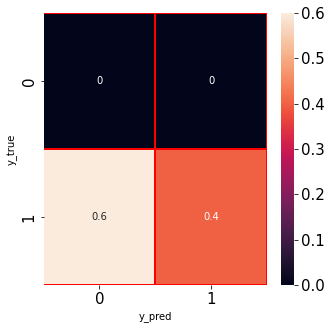

acc :  0.4
F1 Score:  0.28571428571428575
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.40      1.00      0.57         2

    accuracy                           0.40         5
   macro avg       0.20      0.50      0.29         5
weighted avg       0.16      0.40      0.23         5



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [239]:
#Regresión Logistica:
#-----------------------
print('Regresion Logística')
y_pred_RL = RL.predict(x_test)
Matriz_de_confusion(y_pred_RL,y_test)

print("acc : ",accuracy_score(y_test, y_pred_RL))
print("F1 Score: ", f1_score(y_test ,y_pred_RL, average='macro'))
print(classification_report(y_test, y_pred_RL))

In [240]:
## Naive Bayes:

NB = GaussianNB() # Benchmark para comparar contra Linear SVC y XGboost.
NB.fit(x_train,np.array(y_train).ravel())


GaussianNB()

Gaussian Naive Bayes


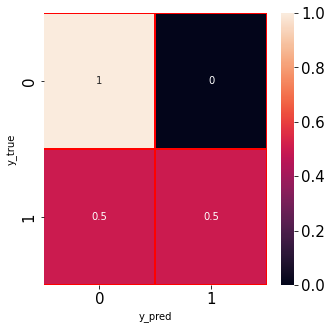

acc :  0.8
F1 Score:  0.7619047619047619
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



In [241]:
print('Gaussian Naive Bayes')
y_pred_NB = NB.predict(x_test)
Matriz_de_confusion(y_test,y_pred_NB)

print("acc : ",accuracy_score(y_test, y_pred_NB))
print("F1 Score: ", f1_score(y_test ,y_pred_NB, average='macro'))
print(classification_report(y_test, y_pred_NB))

https://www.bbc.com/mundo/noticias-internacional-51919935

1.Pruebas, pruebas y más pruebas:  
La Organización Mundial para la Salud (OMS) y los expertos consultados por BBC Mundo coinciden en que la detección temprana de los casos es un factor fundamental para contener la extensión de la pandemia.

"No se pueden tomar acciones ni conocer el impacto real del virus si no sabemos a cuántas personas ha afectado", afirma Nyenswah.

Krys Johnson, profesora de Epidemiología de la Universidad de Temple (EE.UU.), coincide en que este factor ha marcado la diferencia entre algunas naciones que están mostrando mejores resultados en su batalla contra el virus y otras donde el número de casos aumenta rápidamente.
En una conferencia de prensa este lunes, el director de la OMS, Tedros Adhanom Ghebreyesus, consideró que facilitar las pruebas a cualquier persona con síntomas de haberse contagiado era la "columna vertebral para detener la propagación" de la pandemia.

Sin embargo, alertó que muchos gobiernos continúan haciendo los exámenes solo a los pacientes más graves, lo que no solo puede falsear las estadística sino propiciar que personas con síntomas más leves continúen propagando el virus.

2.Aislar a los contagiados
Johnson señala que la realización de pruebas permite no solo aislar a los enfermos y evitar que se propague el virus entre un mayor número de personas, sino que también abre la posibilidad para detectar posibles contagios que todavía no han desarrollado síntomas.

"Corea del Sur y China han realizado excelentes trabajos en el rastreo, pruebas y contención entre sus ciudadanos", señala.

De acuerdo con la experta, el gobierno de Pekín ha sido "hipervigilante" en la detección de nuevos casos potenciales, lo que podría ser una de las causas detrás de la caída de contagios que han reportado.

3.Preparación y reacción rápida
De acuerdo con Nyenswah, quien fue uno de los responsables del combate al ébola en África Occidental, uno de los elementos básicos para la contención de un virus es reaccionar rápidamente antes que los contagios se diseminen por la población.

"Países como Taiwán y Singapur mostraron que la acción rápida para la detección y el aislamiento de nuevos casos puede resultar un factor decisivo para contener la propagación", dice.

"La preparación y la acción rápida resultan fundamentales en los primeros momentos del brote. En Europa y Estados Unidos hemos visto que no solo faltaba preparación sino que se ha reaccionado tarde", indica Nyenswah.

Antes de que se confirmara la transmisión del virus de persona a persona a mediados de enero, Taiwán comenzó a someter a exámenes a todos los pasajeros provenientes de Wuhan, la ciudad china donde comenzó el brote.

4.Distanciamiento social
Según Nyenswah, cuando se reportan los primeros contagios de un nuevo virus en una población, las medidas de contención dejan de tener sentido y otras, como el distanciamiento social, resultan ser más efectivas para evitar que los sectores más vulnerables se contagien.

"Una vez que ya tienes la enfermedad en tu país, ya no valen las medidas de contención. Tienes que comenzar a tomar los pasos correctos o pierdes la posibilidad de detener efectivamente el brote", indica.

De acuerdo con el experto, la rapidez en instruir normas de distanciamiento social en naciones como Hong Kong y Taiwán fue fundamental para reducir los contagios.
Hong Kong orientó a los adultos trabajar desde casa desde finales de enero, cerró las escuelas y canceló todos los eventos sociales.

La medida ha sido replicada en muchos países posteriormente pero, según Johnson, una de las claves para los resultados fue la rapidez con la que se tomó la decisión.


https://publications.iadb.org/publications/spanish/document/La-politica-publica-frente-al-Covid-19-recomendaciones-para--America-Latina-y-el-Caribe.pdf

